In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data using pandas
data = pd.read_csv('movies-tmdb-10000.csv')
data.head()

,Unnamed: 0,title,overview,release_date,vote_average,vote_count,original_language,popularity
0,0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429
1,1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717
2,2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971
3,3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793
4,4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662


# Remove Unwanted Column

In [3]:
# we can see unnamed column is a unwanted column and the over view column dont have any significance for the current analysis
movie = data.drop(['Unnamed: 0','overview'],axis=1)
movie.head()

,title,release_date,vote_average,vote_count,original_language,popularity
0,The Godfather,1972-03-14,8.7,17537,en,103.429
1,The Shawshank Redemption,1994-09-23,8.7,23369,en,119.717
2,Cuando Sea Joven,2022-09-14,8.7,208,es,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022-12-25,8.6,241,en,40.793
4,The Godfather Part II,1974-12-20,8.6,10619,en,61.662


In [4]:
movie

,title,release_date,vote_average,vote_count,original_language,popularity
0,The Godfather,1972-03-14,8.7,17537,en,103.429
1,The Shawshank Redemption,1994-09-23,8.7,23369,en,119.717
2,Cuando Sea Joven,2022-09-14,8.7,208,es,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022-12-25,8.6,241,en,40.793
4,The Godfather Part II,1974-12-20,8.6,10619,en,61.662
...,...,...,...,...,...,...
9995,The Night Before the Exams Today,2007-02-14,5.4,644,it,5.508
9996,Land of the Lost,2009-06-05,5.4,1143,en,15.788
9997,G-Force,2009-07-24,5.4,1659,en,13.003
9998,Intruders,2011-09-12,5.4,437,en,7.006


# Clean The File

In [5]:
# Looking for Null Value
movie.isnull()

,title,release_date,vote_average,vote_count,original_language,popularity
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


Text(0.5, 1.0, 'Informetion About Null')

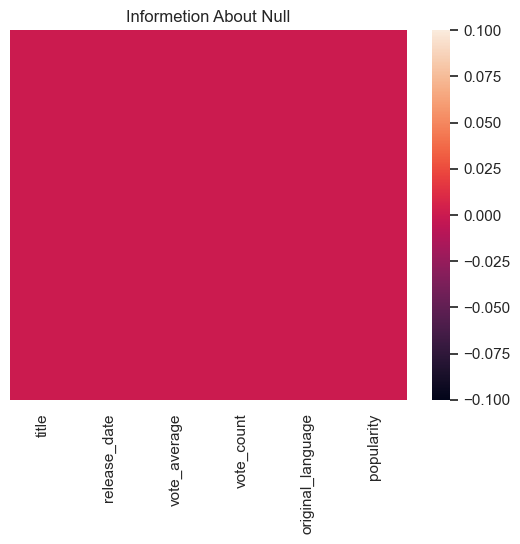

In [6]:
# we can use a heat map to visualize the null value 
sns.heatmap(movie.isnull(),yticklabels=False).set_title('Informetion About Null')
# This graph tell us either this data set have little or no null values

In [7]:
# To visualize the null value we can use .sum()
movie.isnull().sum()

title                0
release_date         0
vote_average         0
vote_count           0
original_language    0
popularity           0
dtype: int64

# Remove Duplicate

In [8]:
# search for duplicate values
movie.nunique()
# as our title culumn is a primery key as it should not contain duplicate we can observe that it only have 9657 unique entries out of 10000 entries
# so we need to clean these duplicate entries

title                9657
release_date         6218
vote_average           34
vote_count           3274
original_language      44
popularity           8276
dtype: int64

In [9]:
movie = movie.drop_duplicates(subset='title')

In [10]:
movie.nunique()

title                9657
release_date         6076
vote_average           34
vote_count           3206
original_language      44
popularity           8028
dtype: int64

In [11]:
movie

,title,release_date,vote_average,vote_count,original_language,popularity
0,The Godfather,1972-03-14,8.7,17537,en,103.429
1,The Shawshank Redemption,1994-09-23,8.7,23369,en,119.717
2,Cuando Sea Joven,2022-09-14,8.7,208,es,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022-12-25,8.6,241,en,40.793
4,The Godfather Part II,1974-12-20,8.6,10619,en,61.662
...,...,...,...,...,...,...
9994,Turistas,2006-12-01,5.4,713,en,11.550
9995,The Night Before the Exams Today,2007-02-14,5.4,644,it,5.508
9996,Land of the Lost,2009-06-05,5.4,1143,en,15.788
9997,G-Force,2009-07-24,5.4,1659,en,13.003


# Manipulate the data for better use

In [12]:
# Split the relese date column into year, month and date
# store the relese date column into a list
relese_date = movie['release_date'].to_list()
year = []
month = []

In [13]:
for i in range(len(relese_date)):
    year.append(relese_date[i][:4])
    month.append(relese_date[i][5:7])

In [14]:
movie['year'] = year
year_int = [eval(i) for i in year]
movie['year'] = year_int

In [15]:
movie['month']=month

In [16]:
# Assign name to month( eg. 1 - January )
movie['month'] = movie['month'].map({'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'})

In [17]:
# creating a column containing week day for respective date
movie['release_date'] = movie['release_date'].map(pd.to_datetime)
relese_date = movie['release_date'].to_list()
day = []
for i in range(len(relese_date)):
    day.append(relese_date[i].strftime('%A'))
day

['Tuesday',
 'Friday',
 'Wednesday',
 'Sunday',
 'Friday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Wednesday',
 'Friday',
 'Thursday',
 'Friday',
 'Monday',
 'Saturday',
 'Friday',
 'Thursday',
 'Monday',
 'Saturday',
 'Friday',
 'Wednesday',
 'Thursday',
 'Monday',
 'Wednesday',
 'Saturday',
 'Thursday',
 'Friday',
 'Wednesday',
 'Saturday',
 'Wednesday',
 'Friday',
 'Thursday',
 'Wednesday',
 'Thursday',
 'Tuesday',
 'Friday',
 'Friday',
 'Friday',
 'Thursday',
 'Saturday',
 'Saturday',
 'Tuesday',
 'Saturday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Tuesday',
 'Friday',
 'Wednesday',
 'Friday',
 'Thursday',
 'Saturday',
 'Friday',
 'Thursday',
 'Thursday',
 'Sunday',
 'Wednesday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Saturday',
 'Sunday',
 'Friday',
 'Wednesday',
 'Friday',
 'Friday',
 'Friday',
 'Friday',
 'Friday',
 'Wednesday',
 'Monday',
 'Wednesday',
 'Tuesday',
 'Monday',
 'Thursday',
 'Friday',
 'Saturday',
 'Wednesday',
 'Tuesday',
 'Saturday',
 'Friday',
 

In [18]:
movie['day'] = day
movie

,title,release_date,vote_average,vote_count,original_language,popularity,year,month,day
0,The Godfather,1972-03-14,8.7,17537,en,103.429,1972,March,Tuesday
1,The Shawshank Redemption,1994-09-23,8.7,23369,en,119.717,1994,September,Friday
2,Cuando Sea Joven,2022-09-14,8.7,208,es,44.971,2022,September,Wednesday
3,"The Boy, the Mole, the Fox and the Horse",2022-12-25,8.6,241,en,40.793,2022,December,Sunday
4,The Godfather Part II,1974-12-20,8.6,10619,en,61.662,1974,December,Friday
...,...,...,...,...,...,...,...,...,...
9994,Turistas,2006-12-01,5.4,713,en,11.550,2006,December,Friday
9995,The Night Before the Exams Today,2007-02-14,5.4,644,it,5.508,2007,February,Wednesday
9996,Land of the Lost,2009-06-05,5.4,1143,en,15.788,2009,June,Friday
9997,G-Force,2009-07-24,5.4,1659,en,13.003,2009,July,Friday


In [19]:
# drop relese date
movie.drop('release_date',axis = 1,inplace = True)

In [20]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9657 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9657 non-null   object 
 1   vote_average       9657 non-null   float64
 2   vote_count         9657 non-null   int64  
 3   original_language  9657 non-null   object 
 4   popularity         9657 non-null   float64
 5   year               9657 non-null   int64  
 6   month              9657 non-null   object 
 7   day                9657 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 679.0+ KB


In [21]:
# Reorder the columns
movie = movie[['title','year','month','day','original_language','vote_average','vote_count','popularity']]

In [22]:
movie.head()

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
1,The Shawshank Redemption,1994,September,Friday,en,8.7,23369,119.717
2,Cuando Sea Joven,2022,September,Wednesday,es,8.7,208,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662


In [23]:
movie.describe()

,year,vote_average,vote_count,popularity
count,9657.000000,9657.000000,9657.000000,9657.000000
mean,2003.054158,6.737009,1630.968934,23.503497
std,17.825296,0.675521,2812.066831,72.435648
min,1895.000000,5.400000,200.000000,0.600000
25%,1996.000000,6.200000,320.000000,9.486000
50%,2009.000000,6.700000,605.000000,13.265000
75%,2016.000000,7.200000,1539.000000,21.981000
max,2023.000000,8.700000,33257.000000,4083.809000


# Analysis

# Overall 

In [24]:
# LETS see how many movies are released in each year
movie.value_counts('year')

year
2018    445
2019    419
2017    413
2016    389
2014    388
       ... 
1902      1
1918      1
1922      1
1929      1
1895      1
Length: 111, dtype: int64

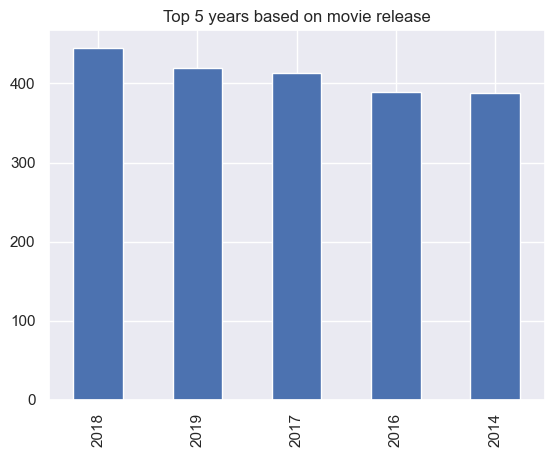

In [25]:
movie['year'].value_counts()[:5].plot(kind = 'bar')
plt.title('Top 5 years based on movie release')
plt.show()

In [26]:
# find top 10 most rated movies
movie.sort_values('vote_average',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
2,Cuando Sea Joven,2022,September,Wednesday,es,8.7,208,44.971
1,The Shawshank Redemption,1994,September,Friday,en,8.7,23369,119.717
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
5,Schindler's List,1993,December,Wednesday,en,8.6,13818,56.298
6,Dilwale Dulhania Le Jayenge,1995,October,Thursday,hi,8.6,4069,25.749
16,The Lord of the Rings: The Return of the King,2003,December,Monday,en,8.5,21212,86.323
24,Primal: Tales of Savagery,2019,November,Thursday,en,8.5,258,16.206
23,Life Is Beautiful,1997,December,Saturday,it,8.5,11737,41.204


In [27]:
# find least rated movies
movie.sort_values('vote_average',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
9853,"Dude, Where's My Car?",2000,December,Friday,en,5.5,1590,12.891
9852,Blood and Chocolate,2007,January,Friday,en,5.5,260,11.570
9850,The Numbers Station,2013,April,Thursday,en,5.5,484,12.086
9986,Jade,1995,October,Friday,en,5.4,206,10.959
9993,Valentine,2001,February,Friday,en,5.4,462,12.139
9994,Turistas,2006,December,Friday,en,5.4,713,11.550
9995,The Night Before the Exams Today,2007,February,Wednesday,it,5.4,644,5.508
9996,Land of the Lost,2009,June,Friday,en,5.4,1143,15.788
9997,G-Force,2009,July,Friday,en,5.4,1659,13.003
9999,Smokin' Aces 2: Assassins' Ball,2010,January,Tuesday,en,5.4,222,8.395


In [28]:
# top 10 movies with highest vote count
movie.sort_values('vote_count',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
53,Inception,2010,July,Thursday,en,8.4,33257,84.393
43,Interstellar,2014,November,Wednesday,en,8.4,30690,138.426
12,The Dark Knight,2008,July,Monday,en,8.5,29259,74.564
1173,Avatar,2009,December,Tuesday,en,7.6,28496,592.036
828,The Avengers,2012,April,Wednesday,en,7.7,28245,146.526
1078,Deadpool,2016,February,Tuesday,en,7.6,28031,121.181
100,Avengers: Infinity War,2018,April,Wednesday,en,8.3,26404,305.313
29,Fight Club,1999,October,Friday,en,8.4,25918,77.508
469,Guardians of the Galaxy,2014,July,Wednesday,en,7.9,25568,38.258
13,Pulp Fiction,1994,September,Saturday,en,8.5,24742,55.544


In [29]:
# 10 movies with least vote_count 
movie.sort_values('vote_count',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
5774,House of Pleasures,2011,September,Wednesday,fr,6.5,200,13.189
4915,Sex Appeal,2022,January,Friday,en,6.7,200,25.788
5928,Something New,2006,January,Sunday,en,6.5,200,8.261
7483,Flirting with Disaster,1996,March,Friday,en,6.2,200,7.716
8209,The Land Before Time VIII: The Big Freeze,2001,December,Tuesday,en,6.0,200,12.171
1970,Butterfly,1999,September,Friday,es,7.4,200,8.514
3263,Power Rangers,2015,February,Tuesday,en,7.1,200,16.603
4765,Blue My Mind,2017,October,Monday,de,6.7,200,9.390
8547,At First Sight,1999,January,Friday,en,6.0,200,8.018
6200,Paint Your Wagon,1969,October,Wednesday,en,6.5,200,9.535


In [30]:
# 10 most popular movies
movie.sort_values('popularity',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
5958,Knock at the Cabin,2023,February,Wednesday,en,6.5,639,4083.809
1754,Black Panther: Wakanda Forever,2022,November,Wednesday,en,7.4,3684,2782.773
22,Puss in Boots: The Last Wish,2022,December,Wednesday,en,8.5,4128,2378.726
3987,Plane,2023,January,Thursday,en,6.9,707,2266.231
770,Avatar: The Way of Water,2022,December,Wednesday,en,7.7,5546,1224.144
1373,M3GAN,2022,December,Wednesday,en,7.5,1833,1133.805
6497,Shotgun Wedding,2022,December,Wednesday,en,6.4,563,1091.581
5937,Ant-Man and the Wasp: Quantumania,2023,February,Wednesday,en,6.5,807,1025.636
371,The Whale,2022,December,Friday,en,8.0,626,844.847
2762,Black Adam,2022,October,Wednesday,en,7.2,4305,776.428


In [31]:
# top 10 least popular movies
movie.sort_values('popularity',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
6841,Los Bandoleros,2009,July,Tuesday,en,6.3,321,0.807
8610,Bring It On Again,2004,January,Tuesday,en,5.9,372,0.668
5870,Bring It On: In It to Win It,2007,December,Wednesday,en,6.5,465,0.618
3952,Tracks,2013,December,Thursday,en,6.9,453,0.600
8400,G.B.F.,2013,April,Friday,en,6.0,379,0.600
9962,Serial Teachers,2013,April,Wednesday,fr,5.5,1121,0.600
3442,Manhunter,1986,August,Thursday,en,7.0,1081,0.600
27,Grave of the Fireflies,1988,April,Saturday,ja,8.4,4526,0.600
3941,Odds and Evens,1978,October,Saturday,it,6.9,337,0.600
41,Hotarubi no Mori e,2011,September,Saturday,ja,8.4,924,0.600


In [32]:
# Is vote_average is the best factor to identify the be best movie??
# Or we should consider other??
movie[(movie['vote_count']<=500) & (movie['vote_average']>=8.0) & (movie['popularity']<=15)]
# Here we can see some movie have good vote average but the vote count is very low as compare to the average vote_count with very low popularity index.
# so we have to consider multiple factor to determine good or bad movie.

,title,year,month,day,original_language,vote_average,vote_count,popularity
17,Dou kyu sei – Classmates,2016,February,Saturday,ja,8.5,291,11.181
30,Impossible Things,2021,June,Thursday,es,8.4,329,12.054
33,The Legend of Hei,2019,August,Tuesday,zh,8.4,257,11.035
52,Burn the Stage: The Movie,2018,November,Thursday,ko,8.4,393,12.872
64,Green Snake,2021,July,Friday,zh,8.3,234,13.634
...,...,...,...,...,...,...,...,...
361,Ivan Vasilyevich Changes His Profession,1973,September,Monday,ru,8.0,286,14.190
370,Sanjuro,1962,January,Monday,ja,8.0,483,11.346
378,Limelight,1952,October,Thursday,en,8.0,432,7.559
384,Doctor Who: A Christmas Carol,2010,December,Saturday,en,8.0,203,8.101


In [33]:
# Best movies of the data set
movie[(movie['vote_count']>=7000) & (movie['vote_average']>=7.8) & (movie['popularity']>=110)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
1,The Shawshank Redemption,1994,September,Friday,en,8.7,23369,119.717
43,Interstellar,2014,November,Wednesday,en,8.4,30690,138.426
94,Avengers: Endgame,2019,April,Wednesday,en,8.3,22734,141.988
100,Avengers: Infinity War,2018,April,Wednesday,en,8.3,26404,305.313
101,The Lion King,1994,June,Thursday,en,8.3,16281,112.610
118,Coco,2017,October,Friday,en,8.2,16916,147.802
124,Zack Snyder's Justice League,2021,March,Thursday,en,8.2,8623,129.795
147,Hacksaw Ridge,2016,October,Friday,en,8.2,11972,217.025
201,Harry Potter and the Deathly Hallows: Part 2,2011,July,Thursday,en,8.1,18436,164.952
275,The Wolf of Wall Street,2013,December,Wednesday,en,8.0,21172,113.443


Text(0.5, 1.0, 'distribution of movie on release day')

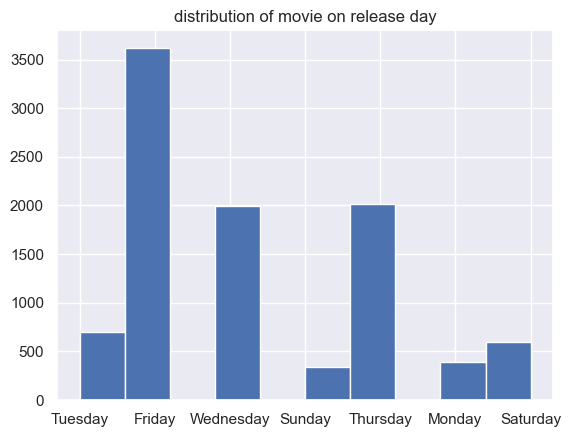

In [34]:
plt.hist(movie['day'])
plt.title('distribution of movie on release day')
# most of the movies were relesed on friday

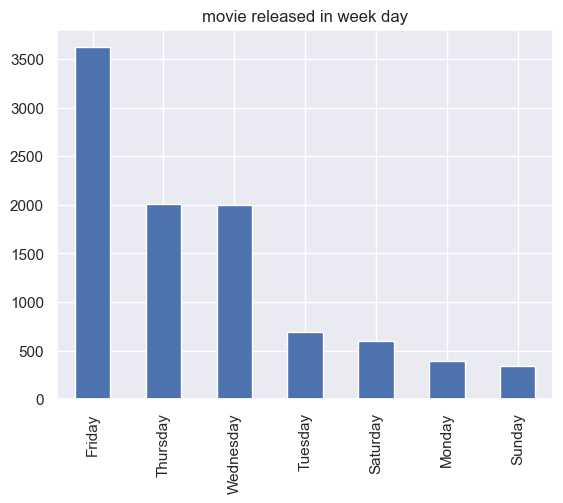

In [35]:
movie['day'].value_counts().plot(kind='bar')
plt.title('movie released in week day')
plt.show()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

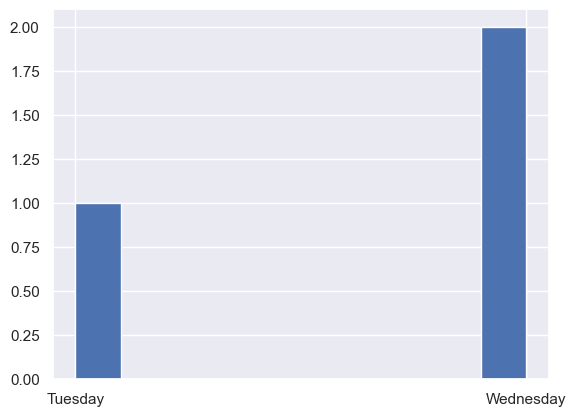

In [36]:
plt.hist(movie[(movie['vote_count']>=5000) & (movie['vote_average']>=7.8) & (movie['popularity']>=300)]['day'])
# most of the successful movies were relesed on wednesday and tuesday 

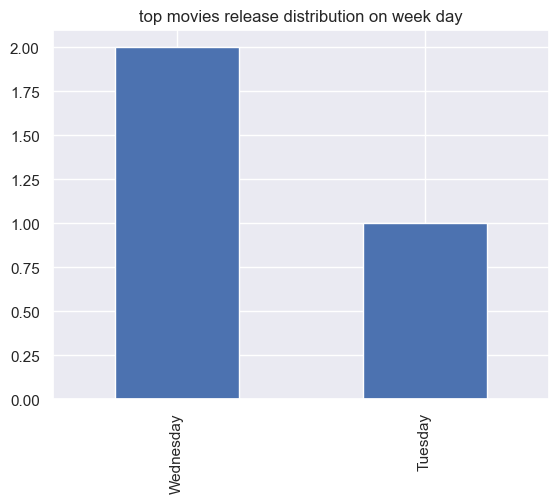

In [37]:
movie[(movie['vote_count']>=5000) & (movie['vote_average']>=7.8) & (movie['popularity']>=300)]['day'].value_counts().plot(kind = 'bar')
plt.title('top movies release distribution on week day')
plt.show()

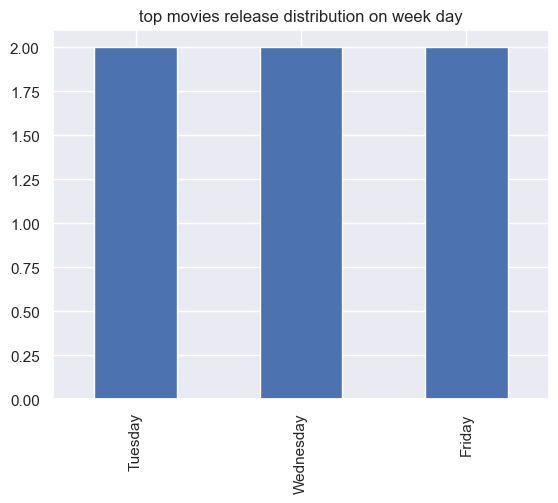

In [38]:
movie[(movie['vote_count']>=5000) & (movie['vote_average']>=7.8) & (movie['popularity']>=200)]['day'].value_counts().plot(kind = 'bar')
plt.title('top movies release distribution on week day')
plt.show()

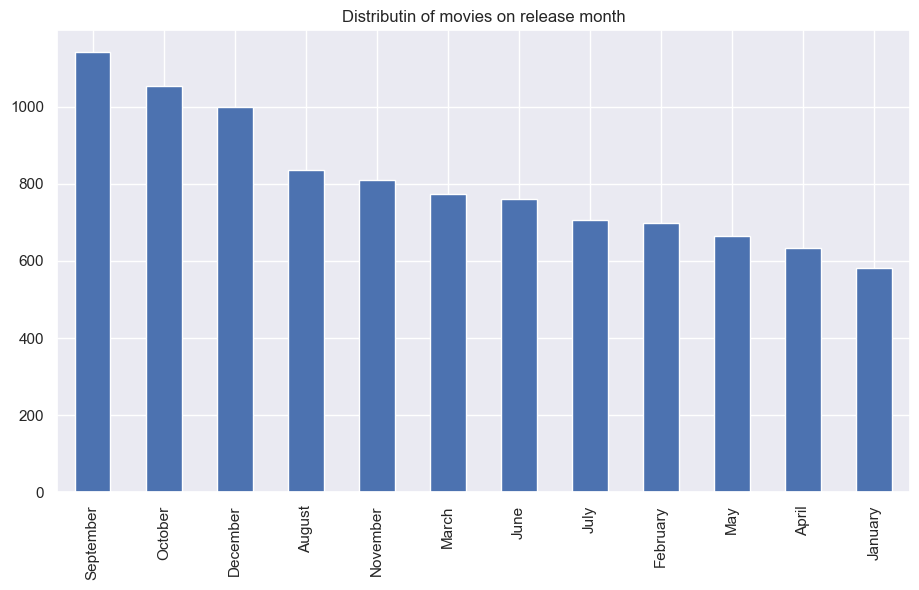

In [39]:
plt.figure(figsize=(11,6))
movie['month'].value_counts().plot(kind = 'bar')
plt.title('Distributin of movies on release month')
plt.show()

Text(0.5, 1.0, 'Distributin of top movies on release month')

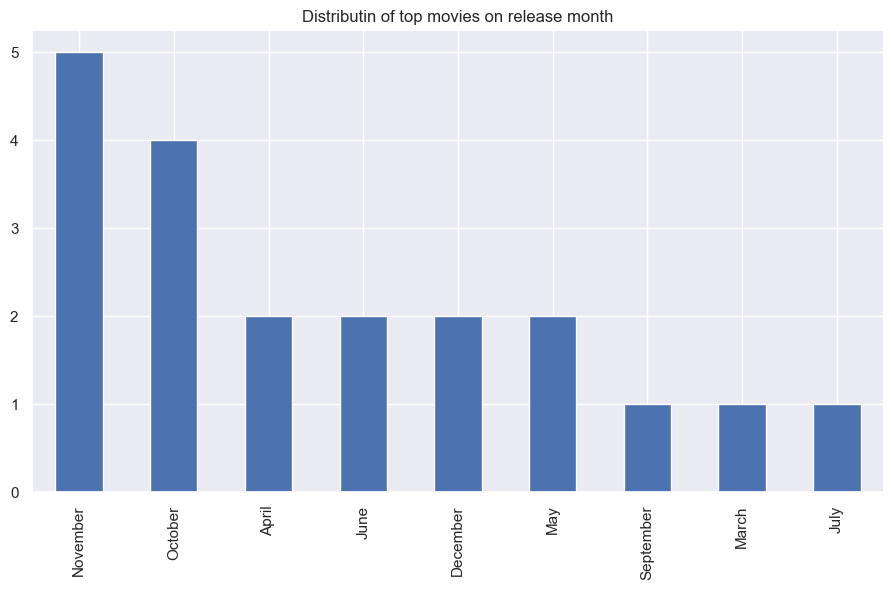

In [40]:
plt.figure(figsize=(11,6))
movie[(movie['vote_count']>=7000) & (movie['vote_average']>=7.8) & (movie['popularity']>=110)]['month'].value_counts().plot(kind = 'bar')
plt.title('Distributin of top movies on release month')

# 1970-80

In [41]:
# Lets Find Those movies who were relesed between 1970 and 1980
movies_70 = movie[movie['year']>=1970][movie[movie['year']>=1970]['year']<=1980]

In [42]:
movies_70.head()

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
31,One Flew Over the Cuckoo's Nest,1975,November,Wednesday,en,8.4,9221,27.736
42,The Empire Strikes Back,1980,May,Tuesday,en,8.4,15092,25.052
83,Apocalypse Now,1979,August,Wednesday,en,8.3,7074,33.150


In [43]:
movies_70.describe()

,year,vote_average,vote_count,popularity
count,430.000000,430.000000,430.000000,430.000000
mean,1975.367442,7.045581,1076.048837,14.390835
std,3.204726,0.593764,2139.432681,10.325638
min,1970.000000,5.600000,200.000000,0.600000
25%,1973.000000,6.600000,284.000000,9.015750
50%,1975.000000,7.100000,437.000000,11.543000
75%,1978.000000,7.475000,848.500000,15.622750
max,1980.000000,8.700000,18309.000000,103.429000


In [44]:
# Number of movie relesed each year
movies_70.value_counts('year')

year
1980    55
1973    46
1979    43
1971    42
1978    42
1974    40
1976    38
1977    36
1975    31
1972    30
1970    27
dtype: int64

In [45]:
# here we can find the the top 5 year have most movie relesed
movies_70.value_counts('year').head()

year
1980    55
1973    46
1979    43
1971    42
1978    42
dtype: int64

In [46]:
movies_70.sort_values('vote_average',ascending=False)

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
31,One Flew Over the Cuckoo's Nest,1975,November,Wednesday,en,8.4,9221,27.736
42,The Empire Strikes Back,1980,May,Tuesday,en,8.4,15092,25.052
83,Apocalypse Now,1979,August,Wednesday,en,8.3,7074,33.150
...,...,...,...,...,...,...,...,...
9438,Prom Night,1980,July,Friday,en,5.7,337,19.257
9497,Airport 1975,1974,October,Friday,en,5.7,210,11.750
9638,Smokey and the Bandit II,1980,August,Friday,en,5.6,232,11.623
9708,10,1979,October,Friday,en,5.6,204,18.517


In [47]:
# find top 10 most rated movies  in 70s
movies_70.sort_values('vote_average',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
31,One Flew Over the Cuckoo's Nest,1975,November,Wednesday,en,8.4,9221,27.736
42,The Empire Strikes Back,1980,May,Tuesday,en,8.4,15092,25.052
83,Apocalypse Now,1979,August,Wednesday,en,8.3,7074,33.150
135,Stalker,1979,May,Friday,ru,8.2,1732,19.824
173,My Friends,1975,October,Friday,it,8.2,615,6.822
160,Taxi Driver,1976,February,Monday,en,8.2,10396,49.830
150,Investigation of a Citizen Above Suspicion,1970,October,Friday,it,8.2,650,10.264
149,Scenes from a Marriage,1974,September,Sunday,sv,8.2,278,13.309


In [48]:
# top 10 movies with highest vote count
movies_70.sort_values('vote_count',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
130,Star Wars,1977,May,Wednesday,en,8.2,18309,65.139
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
121,The Shining,1980,May,Friday,en,8.2,15465,38.196
42,The Empire Strikes Back,1980,May,Tuesday,en,8.4,15092,25.052
188,Alien,1979,May,Friday,en,8.1,12556,59.854
123,A Clockwork Orange,1971,December,Sunday,en,8.2,11395,39.360
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
160,Taxi Driver,1976,February,Monday,en,8.2,10396,49.830
31,One Flew Over the Cuckoo's Nest,1975,November,Wednesday,en,8.4,9221,27.736
965,Jaws,1975,June,Friday,en,7.7,9006,39.615


In [49]:
# 10 most popular movies
movies_70.sort_values('popularity',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
678,Rocky,1976,November,Sunday,en,7.8,6672,76.725
130,Star Wars,1977,May,Wednesday,en,8.2,18309,65.139
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
804,The Exorcist,1973,December,Wednesday,en,7.7,6848,60.457
188,Alien,1979,May,Friday,en,8.1,12556,59.854
2406,Rocky II,1979,June,Friday,en,7.2,3712,57.933
8489,Caligula,1979,August,Tuesday,en,6.0,643,55.318
6109,"Salò, or the 120 Days of Sodom",1976,January,Saturday,it,6.5,1649,54.249
160,Taxi Driver,1976,February,Monday,en,8.2,10396,49.830


In [50]:
# find least rated movies in 70s
movies_70.sort_values('vote_average',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
8960,Any Which Way You Can,1980,December,Wednesday,en,5.8,272,14.606
8969,1941,1979,December,Friday,en,5.8,501,9.432
9065,The Black Hole,1979,December,Tuesday,en,5.8,385,9.024
9349,Xanadu,1980,August,Friday,en,5.7,214,8.222
9365,Battle for the Planet of the Apes,1973,June,Friday,en,5.7,744,15.841
9438,Prom Night,1980,July,Friday,en,5.7,337,19.257
9497,Airport 1975,1974,October,Friday,en,5.7,210,11.750
9638,Smokey and the Bandit II,1980,August,Friday,en,5.6,232,11.623
9708,10,1979,October,Friday,en,5.6,204,18.517
9726,Airport '77,1977,March,Friday,en,5.6,238,13.535


In [51]:
# 10 movies with least vote_count 
movies_70.sort_values('vote_count',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
2124,Tristana,1970,March,Sunday,es,7.3,203,6.832
2056,Claire's Knee,1970,December,Friday,fr,7.3,203,7.304
1900,"Jeanne Dielman, 23, quai du Commerce, 1080 Bru...",1976,January,Wednesday,fr,7.4,203,12.308
4782,The Legend of Hell House,1973,June,Friday,en,6.7,202,10.469
8401,The Wiz,1978,October,Tuesday,en,6.0,202,11.168
1695,Stroszek,1977,January,Wednesday,de,7.4,202,7.111
8695,Return from Witch Mountain,1978,March,Friday,en,5.9,201,7.818
2881,The Killing of a Chinese Bookie,1976,February,Sunday,en,7.1,201,7.264
5299,Hardcore,1979,February,Friday,en,6.6,201,7.694
2171,A Charlie Brown Thanksgiving,1973,November,Tuesday,en,7.3,200,9.418


In [52]:
# top 10 least popular movies
movies_70.sort_values('popularity',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
5430,Night Moves,1975,February,Thursday,en,6.6,228,5.656
2144,Now Where Did the Seventh Company Get to?,1973,May,Thursday,fr,7.3,292,5.617
4221,Martin,1977,October,Thursday,en,6.8,208,5.595
6605,The Discord,1978,March,Thursday,fr,6.4,263,5.521
625,White Collar Blues,1975,March,Thursday,it,7.8,745,5.402
504,The Working Class Goes to Heaven,1971,September,Friday,it,7.9,295,5.323
2003,Horse Fever,1976,October,Friday,it,7.3,318,4.996
2913,Fun Is Beautiful,1980,January,Saturday,it,7.1,367,4.674
1769,Ecce Bombo,1978,March,Wednesday,it,7.4,215,4.616
3941,Odds and Evens,1978,October,Saturday,it,6.9,337,0.600


In [53]:
# no of movies relesead in different languages in 70s
movies_70.value_counts('original_language')

original_language
en    305
it     53
fr     37
de      8
ja      6
ru      5
cn      4
es      4
sv      3
zh      3
cs      1
hi      1
dtype: int64

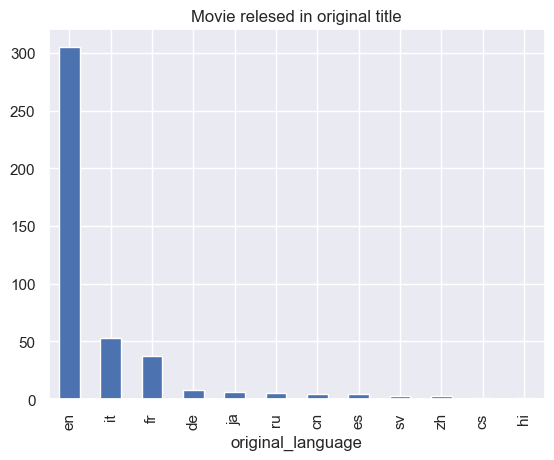

In [54]:
movies_70.value_counts('original_language').plot(kind='bar')
plt.title('Movie relesed in original title')
plt.show()

In [55]:
# Is vote_average is the best factor to identify the be best movie??
# Or we should consider other??
# we will use 1970-80 movie set as sample and consider the result for the populetion
movies_70[(movies_70['vote_count']<=500) & (movies_70['vote_average']>=8.0) & (movies_70['popularity']<=15)]
# Here we can see some movie have good vote average but the vote count is very low as compare to the average vote_count with very low popularity index.
# so we have to consider multiple factor to determine good or bad movie.

,title,year,month,day,original_language,vote_average,vote_count,popularity
105,We All Loved Each Other So Much,1974,December,Saturday,it,8.2,458,8.403
149,Scenes from a Marriage,1974,September,Sunday,sv,8.2,278,13.309
263,Dersu Uzala,1975,August,Saturday,ru,8.0,414,9.942
322,Autumn Sonata,1978,October,Sunday,sv,8.0,466,9.486
361,Ivan Vasilyevich Changes His Profession,1973,September,Monday,ru,8.0,286,14.190


In [56]:
movies_70[(movies_70['vote_count']>=7000) & (movies_70['vote_average']>=7.8)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
31,One Flew Over the Cuckoo's Nest,1975,November,Wednesday,en,8.4,9221,27.736
42,The Empire Strikes Back,1980,May,Tuesday,en,8.4,15092,25.052
83,Apocalypse Now,1979,August,Wednesday,en,8.3,7074,33.150
121,The Shining,1980,May,Friday,en,8.2,15465,38.196
123,A Clockwork Orange,1971,December,Sunday,en,8.2,11395,39.360
130,Star Wars,1977,May,Wednesday,en,8.2,18309,65.139
160,Taxi Driver,1976,February,Monday,en,8.2,10396,49.830
188,Alien,1979,May,Friday,en,8.1,12556,59.854


In [57]:
movies_70[(movies_70['vote_count']>=7000) & (movies_70['vote_average']>=7.8) & (movies_70['popularity']>=100)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429


In [58]:
# Here we can see that 'THE GODFATHER' is the best movie in 1970-80 with high vote_average,vote_count and popularity  
movies_70[(movies_70['vote_count']>=7000) & (movies_70['vote_average']>=7.8) & (movies_70['popularity']>=90)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429


In [59]:
# These are the top 3 movies of this time prriod
movies_70[(movies_70['vote_count']>=7000) & (movies_70['vote_average']>=7.8) & (movies_70['popularity']>=60)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
130,Star Wars,1977,May,Wednesday,en,8.2,18309,65.139


Text(0.5, 1.0, 'distribution of movies based on release day')

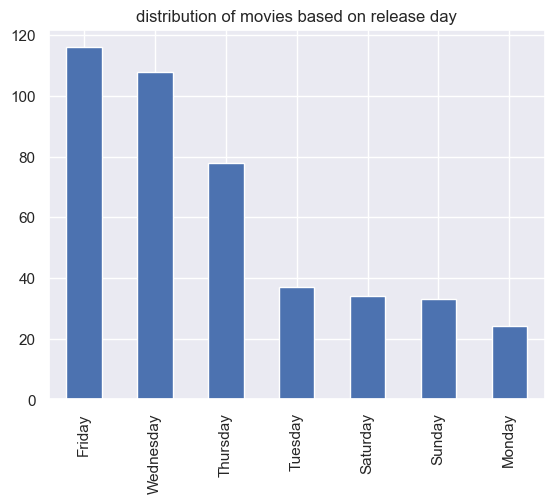

In [60]:
movies_70['day'].value_counts().plot(kind= 'bar')
plt.title('distribution of movies based on release day')
# most of the movies were relesed in 1970-80 on friday and Wednesdays 

In [61]:
movies_70.value_counts('day')

day
Friday       116
Wednesday    108
Thursday      78
Tuesday       37
Saturday      34
Sunday        33
Monday        24
dtype: int64

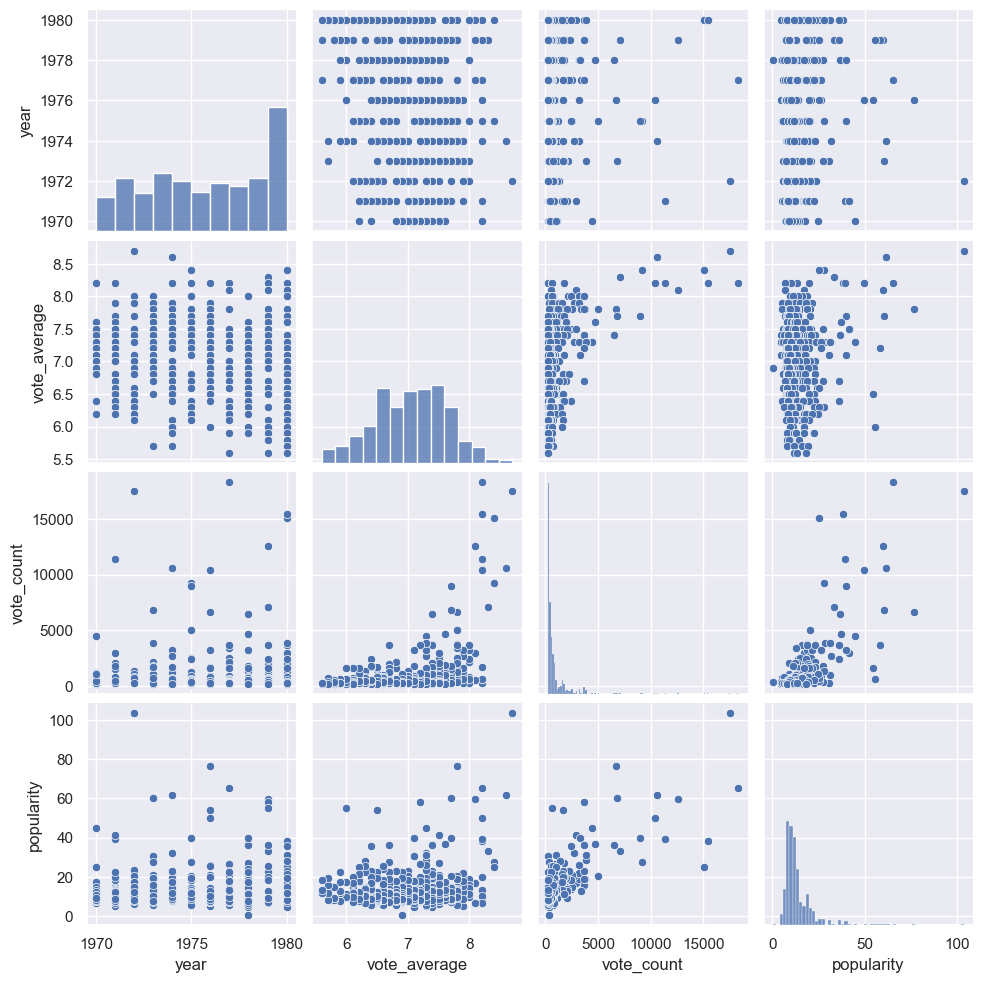

In [62]:
sns.pairplot(movies_70)

# Latest movies(2010 - Present)

In [63]:
# for latest movies dated from 2010 to 2023
movies_latest = movie[movie['year']>=2010][movie[movie['year']>=1970]['year']<=2023]

In [64]:
movies_latest.head()

,title,year,month,day,original_language,vote_average,vote_count,popularity
2,Cuando Sea Joven,2022,September,Wednesday,es,8.7,208,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
9,Your Name.,2016,August,Friday,ja,8.5,9555,94.443
10,Parasite,2019,May,Thursday,ko,8.5,15327,61.217
17,Dou kyu sei – Classmates,2016,February,Saturday,ja,8.5,291,11.181


In [65]:
movies_latest.describe()
# we can see min max std and ither factor

,year,vote_average,vote_count,popularity
count,4562.000000,4562.000000,4562.000000,4562.000000
mean,2016.069268,6.674288,1756.893906,30.331754
std,3.513313,0.673802,3041.130028,103.248975
min,2010.000000,5.400000,200.000000,0.600000
25%,2013.000000,6.100000,321.000000,9.443000
50%,2016.000000,6.600000,613.500000,14.385500
75%,2019.000000,7.200000,1636.000000,26.321500
max,2023.000000,8.700000,33257.000000,4083.809000


In [66]:
# same question can be answer here
movies_latest.value_counts('year')

year
2018    445
2019    419
2017    413
2016    389
2014    388
2015    359
2013    354
2020    329
2021    325
2011    307
2012    296
2010    292
2022    239
2023      7
dtype: int64

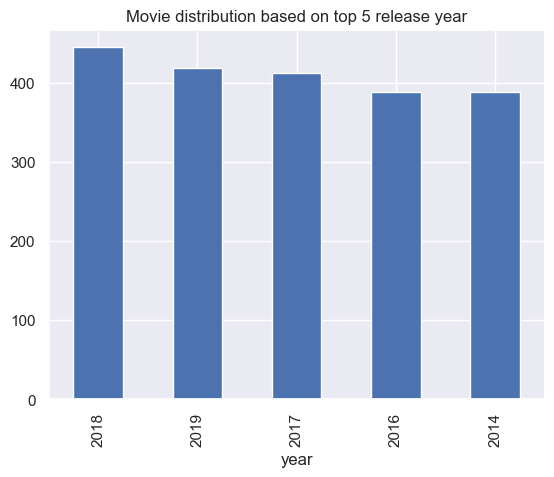

In [67]:
movies_latest.value_counts('year')[:5].plot(kind = 'bar')
plt.title('Movie distribution based on top 5 release year')
plt.show()

In [68]:
movies_latest.sort_values('vote_average',ascending=False)

,title,year,month,day,original_language,vote_average,vote_count,popularity
2,Cuando Sea Joven,2022,September,Wednesday,es,8.7,208,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
9,Your Name.,2016,August,Friday,ja,8.5,9555,94.443
10,Parasite,2019,May,Thursday,ko,8.5,15327,61.217
17,Dou kyu sei – Classmates,2016,February,Saturday,ja,8.5,291,11.181
...,...,...,...,...,...,...,...,...
9841,I Give It a Year,2013,February,Friday,en,5.5,672,13.330
9840,Don't Knock Twice,2016,November,Sunday,en,5.5,676,9.010
9839,Down a Dark Hall,2018,August,Wednesday,en,5.5,604,10.307
9833,Tremors 5: Bloodlines,2015,October,Tuesday,en,5.5,344,16.908


In [69]:
movies_latest.sort_values('vote_average',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
2,Cuando Sea Joven,2022,September,Wednesday,es,8.7,208,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
9,Your Name.,2016,August,Friday,ja,8.5,9555,94.443
10,Parasite,2019,May,Thursday,ko,8.5,15327,61.217
17,Dou kyu sei – Classmates,2016,February,Saturday,ja,8.5,291,11.181
18,Gabriel's Inferno,2020,May,Friday,en,8.5,2326,16.008
22,Puss in Boots: The Last Wish,2022,December,Wednesday,en,8.5,4128,2378.726
24,Primal: Tales of Savagery,2019,November,Thursday,en,8.5,258,16.206
39,A Silent Voice: The Movie,2016,September,Saturday,ja,8.4,3304,58.578
53,Inception,2010,July,Thursday,en,8.4,33257,84.393


In [70]:
movies_latest.sort_values('vote_count',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
53,Inception,2010,July,Thursday,en,8.4,33257,84.393
43,Interstellar,2014,November,Wednesday,en,8.4,30690,138.426
828,The Avengers,2012,April,Wednesday,en,7.7,28245,146.526
1078,Deadpool,2016,February,Tuesday,en,7.6,28031,121.181
100,Avengers: Infinity War,2018,April,Wednesday,en,8.3,26404,305.313
469,Guardians of the Galaxy,2014,July,Wednesday,en,7.9,25568,38.258
170,Django Unchained,2012,December,Tuesday,en,8.2,23738,67.235
94,Avengers: Endgame,2019,April,Wednesday,en,8.3,22734,141.988
156,Joker,2019,October,Tuesday,en,8.2,22285,77.240
141,Shutter Island,2010,February,Sunday,en,8.2,21297,46.847


In [71]:
movies_latest.sort_values('popularity',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
5958,Knock at the Cabin,2023,February,Wednesday,en,6.5,639,4083.809
1754,Black Panther: Wakanda Forever,2022,November,Wednesday,en,7.4,3684,2782.773
22,Puss in Boots: The Last Wish,2022,December,Wednesday,en,8.5,4128,2378.726
3987,Plane,2023,January,Thursday,en,6.9,707,2266.231
770,Avatar: The Way of Water,2022,December,Wednesday,en,7.7,5546,1224.144
1373,M3GAN,2022,December,Wednesday,en,7.5,1833,1133.805
6497,Shotgun Wedding,2022,December,Wednesday,en,6.4,563,1091.581
5937,Ant-Man and the Wasp: Quantumania,2023,February,Wednesday,en,6.5,807,1025.636
371,The Whale,2022,December,Friday,en,8.0,626,844.847
2762,Black Adam,2022,October,Wednesday,en,7.2,4305,776.428


In [72]:
movies_latest.sort_values('vote_average',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
9850,The Numbers Station,2013,April,Thursday,en,5.5,484,12.086
9848,"Big Mommas: Like Father, Like Son",2011,February,Wednesday,en,5.5,1076,23.696
9846,Superchondriac,2014,February,Wednesday,fr,5.5,983,5.591
9845,The Polka King,2017,January,Sunday,en,5.5,243,11.454
9844,7 Women and a Murder,2021,December,Saturday,it,5.5,214,49.775
9841,I Give It a Year,2013,February,Friday,en,5.5,672,13.330
9840,Don't Knock Twice,2016,November,Sunday,en,5.5,676,9.010
9839,Down a Dark Hall,2018,August,Wednesday,en,5.5,604,10.307
9833,Tremors 5: Bloodlines,2015,October,Tuesday,en,5.5,344,16.908
9999,Smokin' Aces 2: Assassins' Ball,2010,January,Tuesday,en,5.4,222,8.395


In [73]:
movies_latest.sort_values('vote_count',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
456,"Happy Halloween, Scooby-Doo!",2020,October,Tuesday,en,7.9,200,19.963
5549,Cut Off,2018,October,Thursday,de,6.6,200,8.353
5774,House of Pleasures,2011,September,Wednesday,fr,6.5,200,13.189
4157,Stromberg – The Movie,2014,February,Thursday,de,6.9,200,4.620
6963,Jarhead 3: The Siege,2016,January,Wednesday,en,6.3,200,15.737
3263,Power Rangers,2015,February,Tuesday,en,7.1,200,16.603
1584,Fireheart,2022,January,Sunday,en,7.4,200,49.947
4765,Blue My Mind,2017,October,Monday,de,6.7,200,9.390
7959,Hard Target 2,2016,July,Thursday,en,6.1,200,21.263
4915,Sex Appeal,2022,January,Friday,en,6.7,200,25.788


In [74]:
movies_latest.sort_values('popularity',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
6020,Lego Batman: The Movie - DC Super Heroes Unite,2013,May,Tuesday,en,6.5,219,2.246
7848,Resident Evil: The Final Chapter,2016,December,Friday,en,6.1,2729,2.010
8189,Resident Evil: Afterlife,2010,September,Thursday,en,6.0,3379,1.722
5960,A Rainy Day in New York,2019,July,Friday,en,6.5,1990,1.096
7140,The Internship,2013,June,Friday,en,6.3,3800,1.082
2554,Toy Story of Terror!,2013,October,Wednesday,en,7.2,796,1.020
3952,Tracks,2013,December,Thursday,en,6.9,453,0.600
8400,G.B.F.,2013,April,Friday,en,6.0,379,0.600
41,Hotarubi no Mori e,2011,September,Saturday,ja,8.4,924,0.600
9962,Serial Teachers,2013,April,Wednesday,fr,5.5,1121,0.600


In [75]:
movies_latest.value_counts('original_language')

original_language
en    3331
fr     360
it     199
es     155
ja     127
ko      66
de      56
zh      42
pt      30
ru      28
hi      24
da      18
no      17
pl      13
sv      13
cn      12
tr      10
nl      10
id       7
th       6
fi       4
hu       4
is       4
fa       4
ar       3
te       3
sr       2
uk       2
eu       2
el       2
ro       1
nb       1
la       1
km       1
he       1
gl       1
et       1
ml       1
dtype: int64

In [76]:
movies_latest[(movies_latest['vote_count']<=300) & (movies_latest['vote_average']>=8) & (movies_latest['popularity']<=50)]
# In latest movies it is found that movies with high vote_average but having very low vote_count and popularity is more than the movies relesed in 1970-80
# So our idea to consider vote_count and popularity along with vote average to find good movies rather than consider only vote_average 

,title,year,month,day,original_language,vote_average,vote_count,popularity
2,Cuando Sea Joven,2022,September,Wednesday,es,8.7,208,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
17,Dou kyu sei – Classmates,2016,February,Saturday,ja,8.5,291,11.181
24,Primal: Tales of Savagery,2019,November,Thursday,en,8.5,258,16.206
33,The Legend of Hei,2019,August,Tuesday,zh,8.4,257,11.035
64,Green Snake,2021,July,Friday,zh,8.3,234,13.634
65,Violet Evergarden: The Movie,2020,September,Friday,ja,8.3,299,46.173
81,Taylor Swift: Reputation Stadium Tour,2018,December,Monday,en,8.3,263,11.316
126,Violet Evergarden: Eternity and the Auto Memor...,2019,September,Friday,ja,8.2,284,28.649
154,Abraham Lincoln Vampire Hunter: The Great Cala...,2012,October,Tuesday,en,8.2,206,4.919


In [77]:
# heare we will consider same parameter as consider for movies_70 to find good movies and find out how many movies satisfy these condition
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=60)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
9,Your Name.,2016,August,Friday,ja,8.5,9555,94.443
10,Parasite,2019,May,Thursday,ko,8.5,15327,61.217
35,Spider-Man: Into the Spider-Verse,2018,December,Friday,en,8.4,12425,94.868
43,Interstellar,2014,November,Wednesday,en,8.4,30690,138.426
46,Whiplash,2014,October,Friday,en,8.4,13163,69.378
53,Inception,2010,July,Thursday,en,8.4,33257,84.393
94,Avengers: Endgame,2019,April,Wednesday,en,8.3,22734,141.988
100,Avengers: Infinity War,2018,April,Wednesday,en,8.3,26404,305.313
118,Coco,2017,October,Friday,en,8.2,16916,147.802
124,Zack Snyder's Justice League,2021,March,Thursday,en,8.2,8623,129.795


In [78]:
#we can observe that 28 movies satisfy these condition while only 3 movies from movies_70 database 
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=60)].describe()

,year,vote_average,vote_count,popularity
count,28.000000,28.000000,28.000000,28.000000
mean,2015.857143,8.121429,16468.035714,123.254643
std,3.728909,0.228290,6842.446955,80.608386
min,2010.000000,7.800000,7117.000000,60.309000
25%,2012.750000,7.900000,11415.250000,73.332250
50%,2016.000000,8.150000,16153.500000,94.655500
75%,2019.000000,8.300000,20703.250000,143.441500
max,2021.000000,8.500000,33257.000000,425.542000


In [79]:
# Lets stringent our condition and find out best 3 movies based on our condition
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=200)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
100,Avengers: Infinity War,2018,April,Wednesday,en,8.3,26404,305.313
147,Hacksaw Ridge,2016,October,Friday,en,8.2,11972,217.025
299,Spider-Man: No Way Home,2021,December,Wednesday,en,8.0,16842,425.542


Text(0.5, 1.0, 'Distribution of movies on their release day')

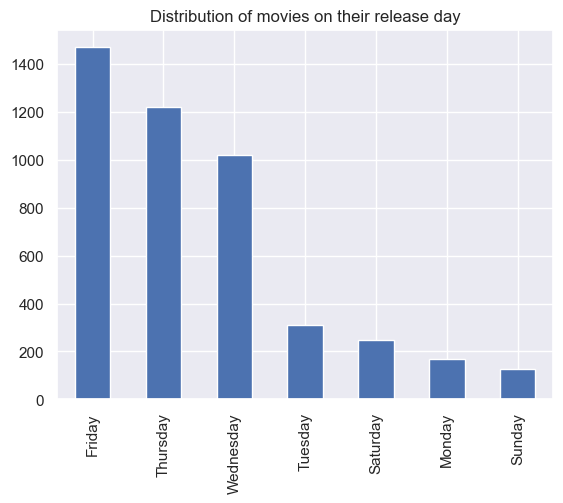

In [80]:
# Lets find out in which day of the week most of the movies are released
# Also we will try to find out is there any effect of the day of the release on ther success
movies_latest['day'].value_counts().plot(kind = 'bar')
plt.title('Distribution of movies on their release day')

Text(0.5, 1.0, 'Distribution of top preforming movies on their release day')

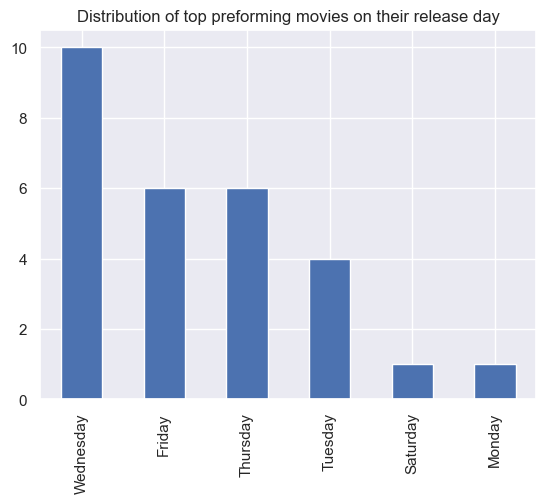

In [81]:
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=60)]['day'].value_counts().plot(kind = 'bar')
plt.title('Distribution of top preforming movies on their release day')
# From the 2 Plots we can clearly visualize that most of the latest movies were released in friday and thursday while most of successful latest movies were released on Wednesday. 

In [82]:
#lets find out the values in number
movies_latest.value_counts('day')

day
Friday       1470
Thursday     1220
Wednesday    1019
Tuesday       309
Saturday      248
Monday        168
Sunday        128
dtype: int64

In [83]:
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=60)].value_counts('day')

day
Wednesday    10
Friday        6
Thursday      6
Tuesday       4
Monday        1
Saturday      1
dtype: int64

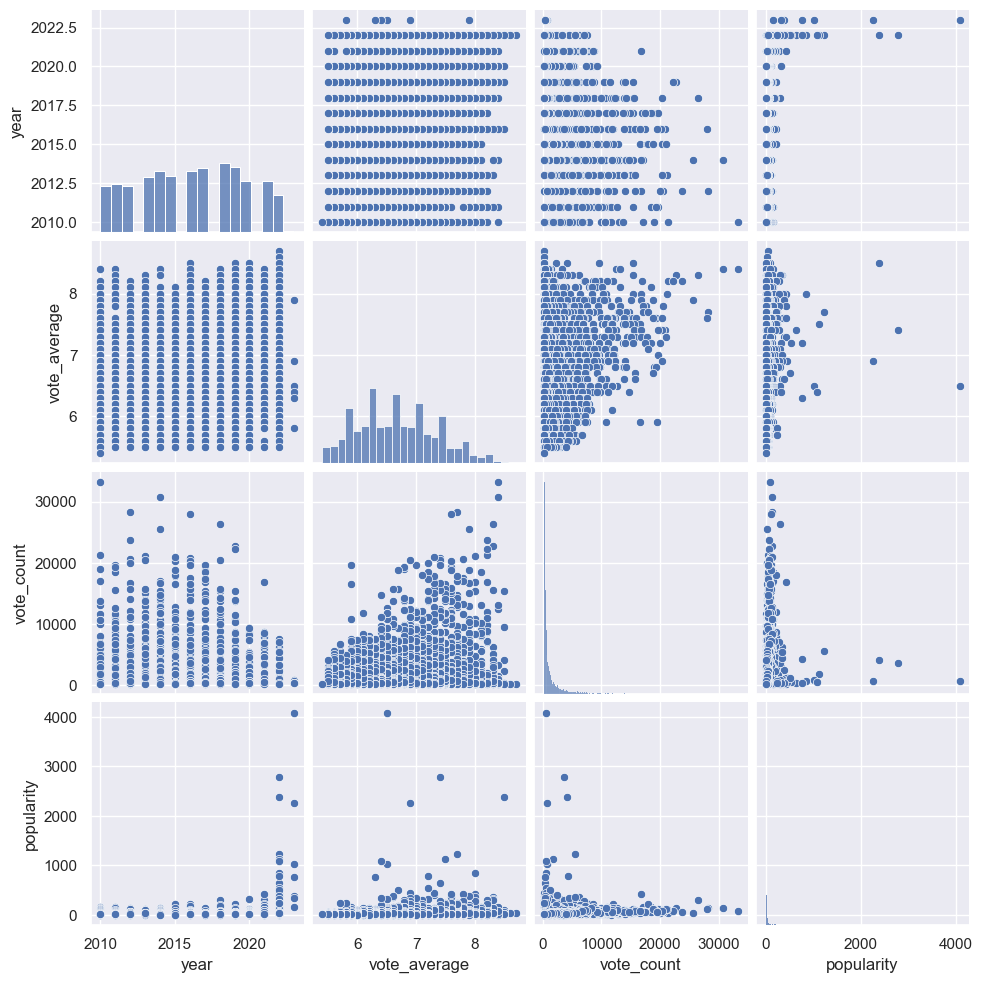

In [84]:
sns.pairplot(movies_latest)

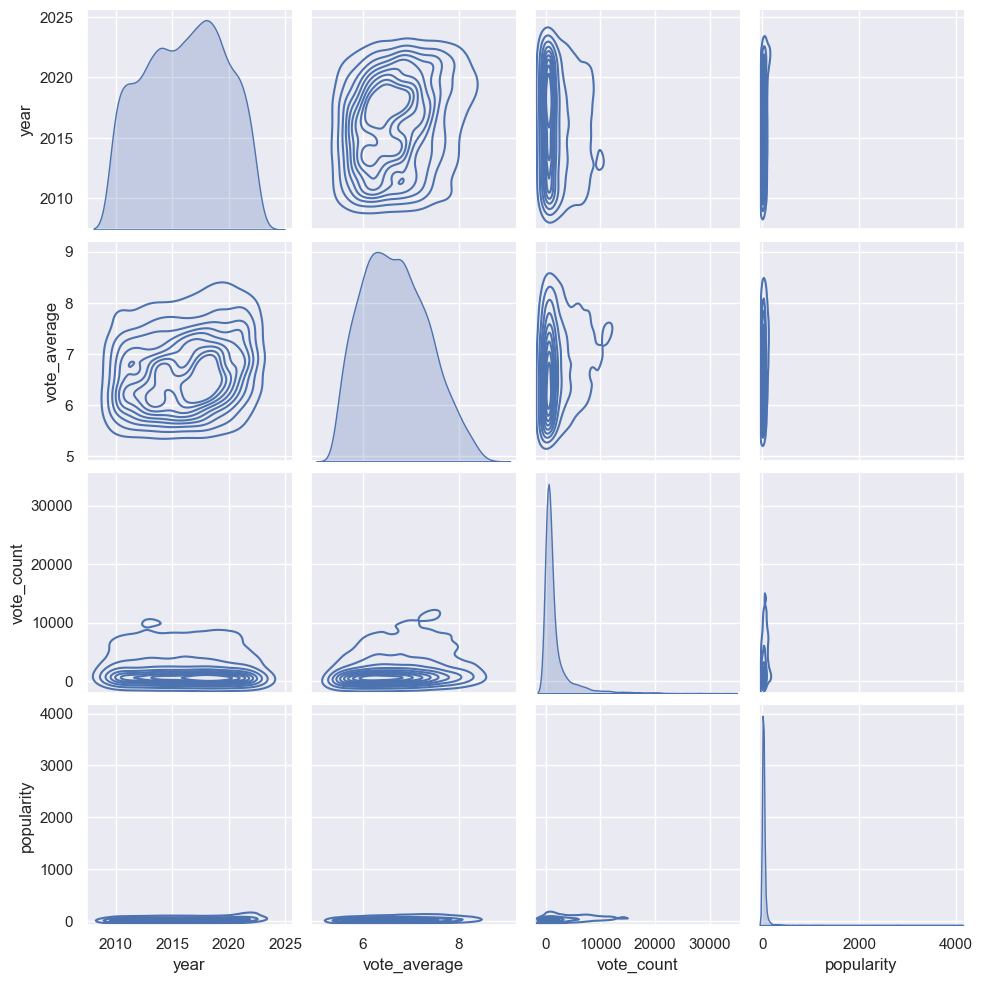

In [85]:
# different type of pair plots
sns.pairplot(movies_latest,kind='kde')

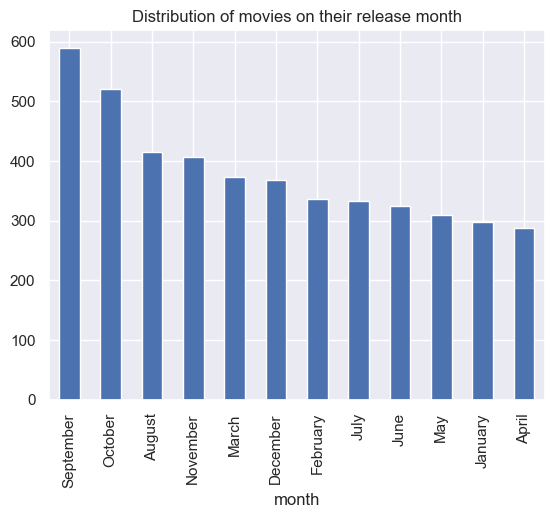

In [86]:
# Let's find out number movie released per month and compare with successful movies
# Most of the latest movies were released in September and october
movies_latest.value_counts('month').plot(kind = 'bar')
plt.title('Distribution of movies on their release month')
plt.show()

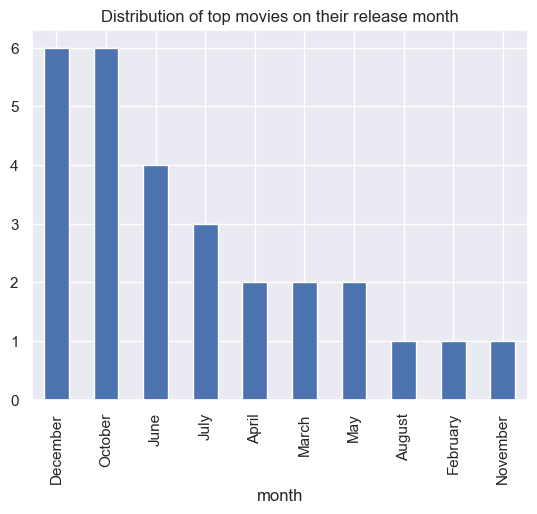

In [87]:
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=60)].value_counts('month').plot(kind='bar')
plt.title('Distribution of top movies on their release month')
plt.show()

(array([958., 415., 309., 337., 406., 333., 325., 521., 373., 585.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

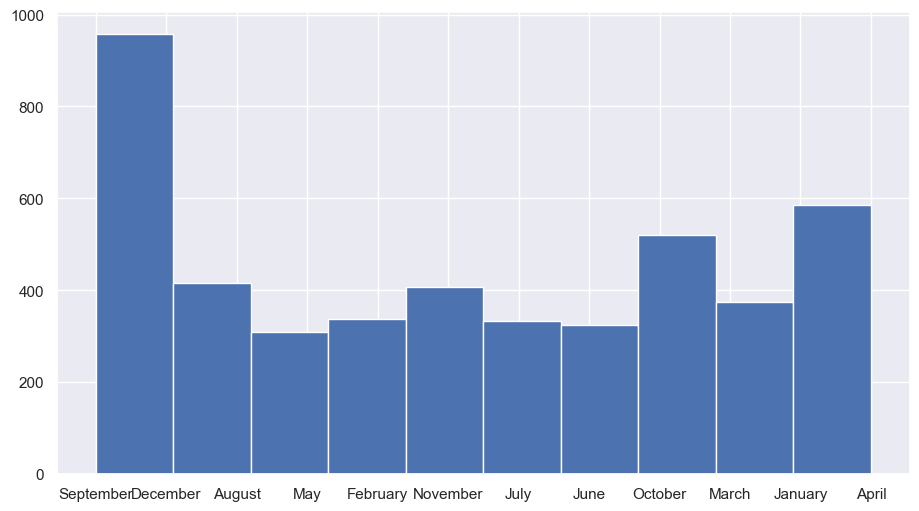

In [88]:
plt.figure(figsize=(11,6))
plt.hist(movies_latest['month'])

(array([1., 2., 6., 1., 6., 3., 2., 2., 4., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

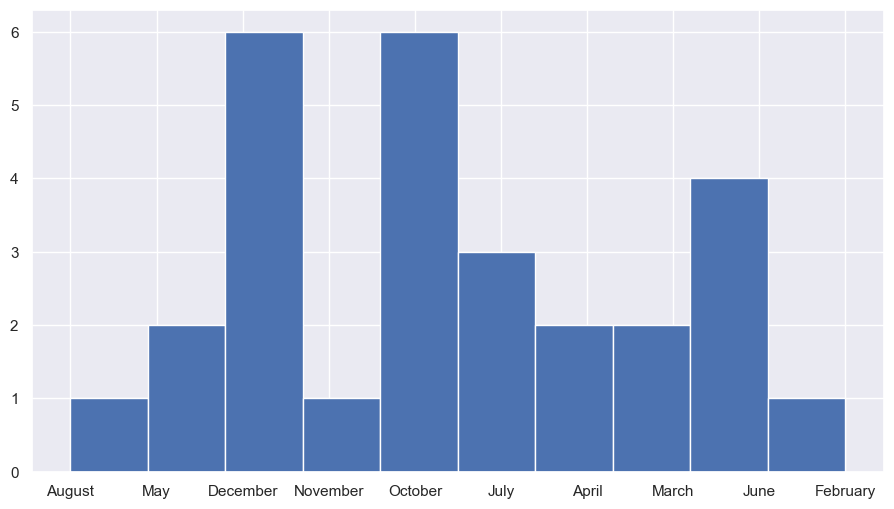

In [89]:
plt.figure(figsize=(11,6))
plt.hist(movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=60)]['month'])

# Analysis Based on language

In [90]:
movie

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
1,The Shawshank Redemption,1994,September,Friday,en,8.7,23369,119.717
2,Cuando Sea Joven,2022,September,Wednesday,es,8.7,208,44.971
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
...,...,...,...,...,...,...,...,...
9994,Turistas,2006,December,Friday,en,5.4,713,11.550
9995,The Night Before the Exams Today,2007,February,Wednesday,it,5.4,644,5.508
9996,Land of the Lost,2009,June,Friday,en,5.4,1143,15.788
9997,G-Force,2009,July,Friday,en,5.4,1659,13.003


In [91]:
# So lets create individual our data set for movies relesed in english and hindi
movie_english = movie[movie['original_language']=='en']

In [92]:
Bollywood = movie[movie['original_language']=='hi']

In [93]:
# so lets start with Hollywood movies (english)
movie_english

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
1,The Shawshank Redemption,1994,September,Friday,en,8.7,23369,119.717
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
5,Schindler's List,1993,December,Wednesday,en,8.6,13818,56.298
...,...,...,...,...,...,...,...,...
9993,Valentine,2001,February,Friday,en,5.4,462,12.139
9994,Turistas,2006,December,Friday,en,5.4,713,11.550
9996,Land of the Lost,2009,June,Friday,en,5.4,1143,15.788
9997,G-Force,2009,July,Friday,en,5.4,1659,13.003


In [94]:
movie_english.describe()

,year,vote_average,vote_count,popularity
count,7376.000000,7376.000000,7376.000000,7376.000000
mean,2002.909707,6.658704,1936.283894,25.665031
std,17.465262,0.651009,3109.560962,81.016372
min,1903.000000,5.400000,200.000000,0.600000
25%,1996.000000,6.200000,362.000000,10.262000
50%,2008.000000,6.600000,767.000000,14.394500
75%,2015.000000,7.100000,1994.000000,23.853500
max,2023.000000,8.700000,33257.000000,4083.809000


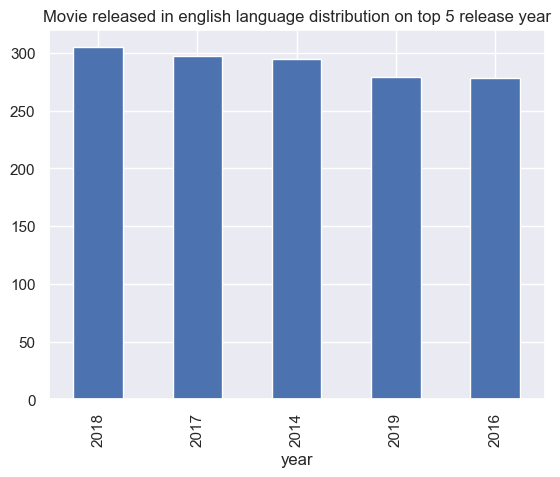

In [95]:
movie_english.value_counts('year')[:5].plot(kind='bar')
plt.title('Movie released in english language distribution on top 5 release year')
plt.show()

In [96]:
# Let's sort it based on votr_average
movie_english.sort_values('vote_average',ascending=False)

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
1,The Shawshank Redemption,1994,September,Friday,en,8.7,23369,119.717
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
5,Schindler's List,1993,December,Wednesday,en,8.6,13818,56.298
...,...,...,...,...,...,...,...,...
9993,Valentine,2001,February,Friday,en,5.4,462,12.139
9994,Turistas,2006,December,Friday,en,5.4,713,11.550
9996,Land of the Lost,2009,June,Friday,en,5.4,1143,15.788
9997,G-Force,2009,July,Friday,en,5.4,1659,13.003


In [97]:
# lets find out top ratted english movies
movie_english.sort_values('vote_average',ascending=False).head()

,title,year,month,day,original_language,vote_average,vote_count,popularity
0,The Godfather,1972,March,Tuesday,en,8.7,17537,103.429
1,The Shawshank Redemption,1994,September,Friday,en,8.7,23369,119.717
3,"The Boy, the Mole, the Fox and the Horse",2022,December,Sunday,en,8.6,241,40.793
4,The Godfather Part II,1974,December,Friday,en,8.6,10619,61.662
5,Schindler's List,1993,December,Wednesday,en,8.6,13818,56.298


In [98]:
# Let's find out top 10 movies based on vote count
movie_english.sort_values('vote_count',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
53,Inception,2010,July,Thursday,en,8.4,33257,84.393
43,Interstellar,2014,November,Wednesday,en,8.4,30690,138.426
12,The Dark Knight,2008,July,Monday,en,8.5,29259,74.564
1173,Avatar,2009,December,Tuesday,en,7.6,28496,592.036
828,The Avengers,2012,April,Wednesday,en,7.7,28245,146.526
1078,Deadpool,2016,February,Tuesday,en,7.6,28031,121.181
100,Avengers: Infinity War,2018,April,Wednesday,en,8.3,26404,305.313
29,Fight Club,1999,October,Friday,en,8.4,25918,77.508
469,Guardians of the Galaxy,2014,July,Wednesday,en,7.9,25568,38.258
13,Pulp Fiction,1994,September,Saturday,en,8.5,24742,55.544


In [99]:
# Let's find out movies with least vote count
movie_english.sort_values('vote_count',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
2889,Barbie: Princess Adventure,2020,September,Tuesday,en,7.1,200,32.785
5928,Something New,2006,January,Sunday,en,6.5,200,8.261
456,"Happy Halloween, Scooby-Doo!",2020,October,Tuesday,en,7.9,200,19.963
7483,Flirting with Disaster,1996,March,Friday,en,6.2,200,7.716
4915,Sex Appeal,2022,January,Friday,en,6.7,200,25.788
3198,Gentleman's Agreement,1947,November,Tuesday,en,7.1,200,11.168
9475,Columbus Circle,2012,March,Monday,en,5.7,200,6.273
3263,Power Rangers,2015,February,Tuesday,en,7.1,200,16.603
3310,Two for the Road,1967,April,Thursday,en,7.0,200,6.096
8209,The Land Before Time VIII: The Big Freeze,2001,December,Tuesday,en,6.0,200,12.171


In [100]:
#Top 10 most popular english movies
movie_english.sort_values('popularity',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
5958,Knock at the Cabin,2023,February,Wednesday,en,6.5,639,4083.809
1754,Black Panther: Wakanda Forever,2022,November,Wednesday,en,7.4,3684,2782.773
22,Puss in Boots: The Last Wish,2022,December,Wednesday,en,8.5,4128,2378.726
3987,Plane,2023,January,Thursday,en,6.9,707,2266.231
770,Avatar: The Way of Water,2022,December,Wednesday,en,7.7,5546,1224.144
1373,M3GAN,2022,December,Wednesday,en,7.5,1833,1133.805
6497,Shotgun Wedding,2022,December,Wednesday,en,6.4,563,1091.581
5937,Ant-Man and the Wasp: Quantumania,2023,February,Wednesday,en,6.5,807,1025.636
371,The Whale,2022,December,Friday,en,8.0,626,844.847
2762,Black Adam,2022,October,Wednesday,en,7.2,4305,776.428


In [101]:
#Top 10 least popular english
movie_english.sort_values('popularity',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
4529,Bring It On: Fight to the Finish,2009,July,Friday,en,6.8,473,1.120
5960,A Rainy Day in New York,2019,July,Friday,en,6.5,1990,1.096
7140,The Internship,2013,June,Friday,en,6.3,3800,1.082
2554,Toy Story of Terror!,2013,October,Wednesday,en,7.2,796,1.020
6841,Los Bandoleros,2009,July,Tuesday,en,6.3,321,0.807
8610,Bring It On Again,2004,January,Tuesday,en,5.9,372,0.668
5870,Bring It On: In It to Win It,2007,December,Wednesday,en,6.5,465,0.618
3952,Tracks,2013,December,Thursday,en,6.9,453,0.600
3442,Manhunter,1986,August,Thursday,en,7.0,1081,0.600
8400,G.B.F.,2013,April,Friday,en,6.0,379,0.600


In [102]:
#lets find out best performing movies who satisfy our conditions
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=110)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
43,Interstellar,2014,November,Wednesday,en,8.4,30690,138.426
94,Avengers: Endgame,2019,April,Wednesday,en,8.3,22734,141.988
100,Avengers: Infinity War,2018,April,Wednesday,en,8.3,26404,305.313
118,Coco,2017,October,Friday,en,8.2,16916,147.802
124,Zack Snyder's Justice League,2021,March,Thursday,en,8.2,8623,129.795
147,Hacksaw Ridge,2016,October,Friday,en,8.2,11972,217.025
201,Harry Potter and the Deathly Hallows: Part 2,2011,July,Thursday,en,8.1,18436,164.952
275,The Wolf of Wall Street,2013,December,Wednesday,en,8.0,21172,113.443
299,Spider-Man: No Way Home,2021,December,Wednesday,en,8.0,16842,425.542
461,Me Before You,2016,June,Wednesday,en,7.9,10888,160.648


In [103]:
# Let's find out number movie released per month and compare with successful movies
# Most of the latest movies were released in September and october
movie_english.value_counts('month')

month
September    870
October      784
December     723
August       659
November     646
June         631
March        565
July         553
May          518
February     507
April        494
January      426
dtype: int64

In [104]:
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=110)].value_counts('month')

month
October     3
April       2
December    2
July        1
June        1
March       1
November    1
dtype: int64

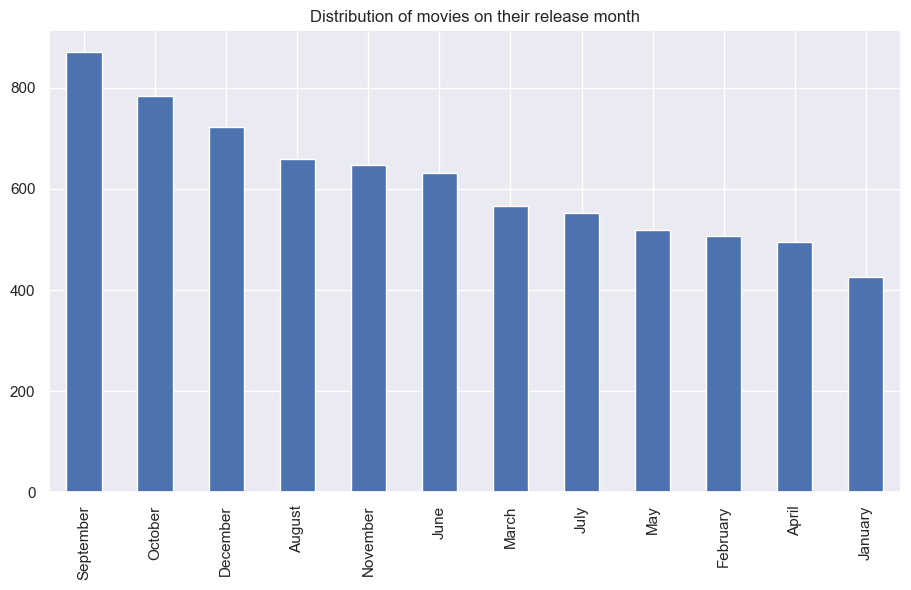

In [105]:
plt.figure(figsize=(11,6))
movie_english['month'].value_counts().plot(kind ='bar')
plt.title('Distribution of movies on their release month')
plt.show()

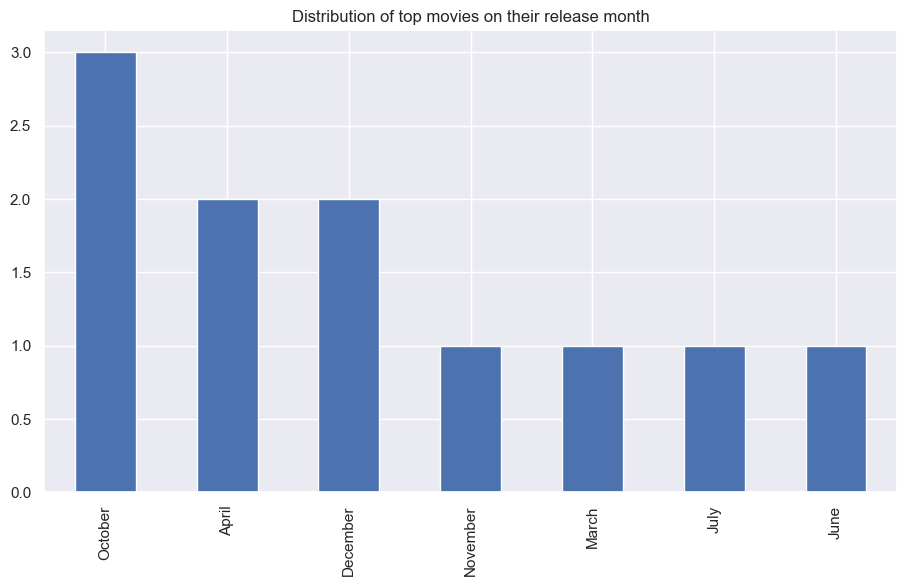

In [106]:
plt.figure(figsize=(11,6))
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=110)]['month'].value_counts().plot(kind= 'bar')
plt.title('Distribution of top movies on their release month')
plt.show()

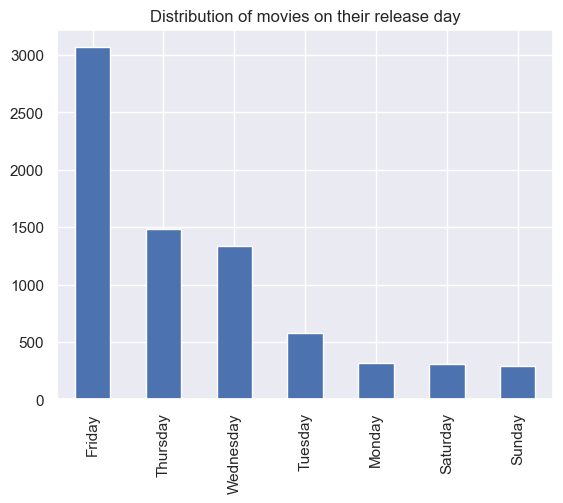

In [107]:
# Majority of english movies were released on friday
movie_english['day'].value_counts().plot(kind = 'bar')
plt.title('Distribution of movies on their release day')
plt.show()

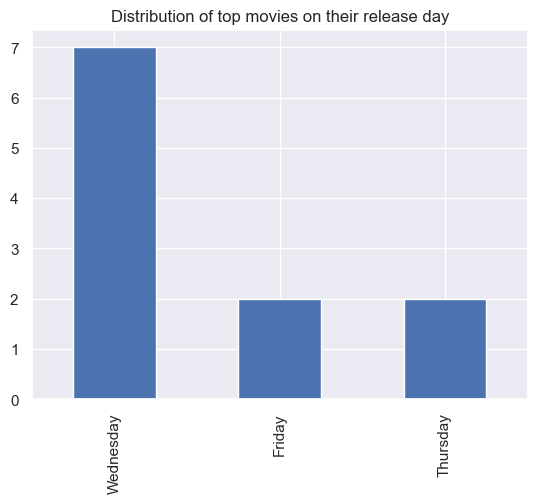

In [108]:
# Majority of successful english movies were released on Wednesday 
movies_latest[(movies_latest['vote_count']>=7000) & (movies_latest['vote_average']>=7.8) & (movies_latest['popularity']>=110)]['day'].value_counts().plot(kind = 'bar')
plt.title('Distribution of top movies on their release day')
plt.show()

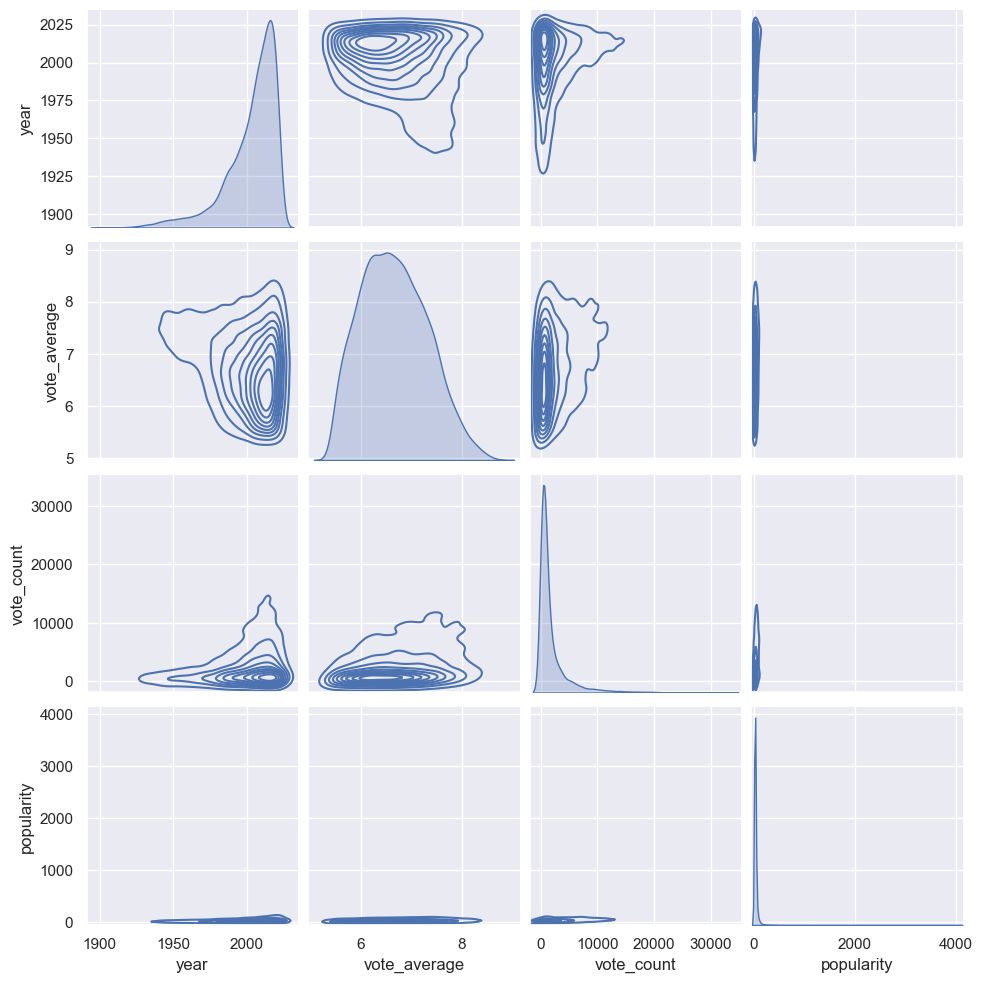

In [109]:
sns.pairplot(movie_english,kind='kde')

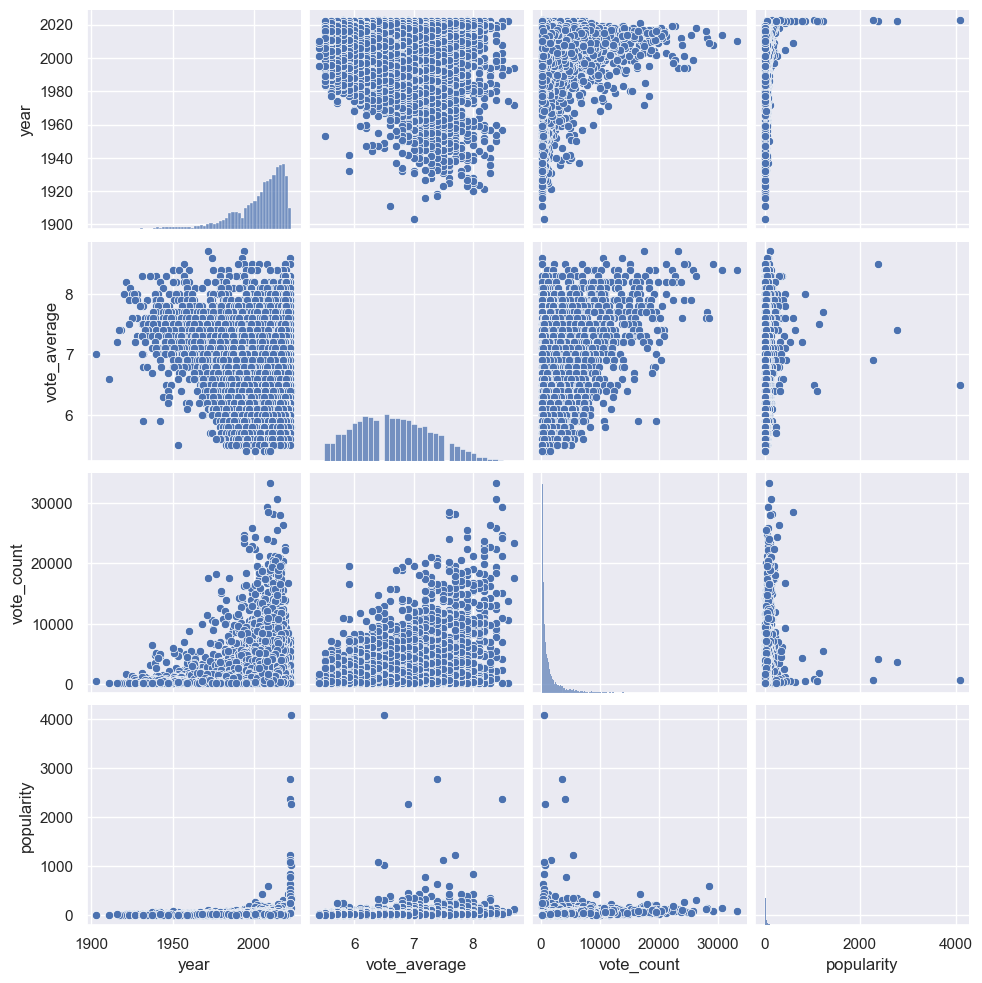

In [110]:
sns.pairplot(movie_english)

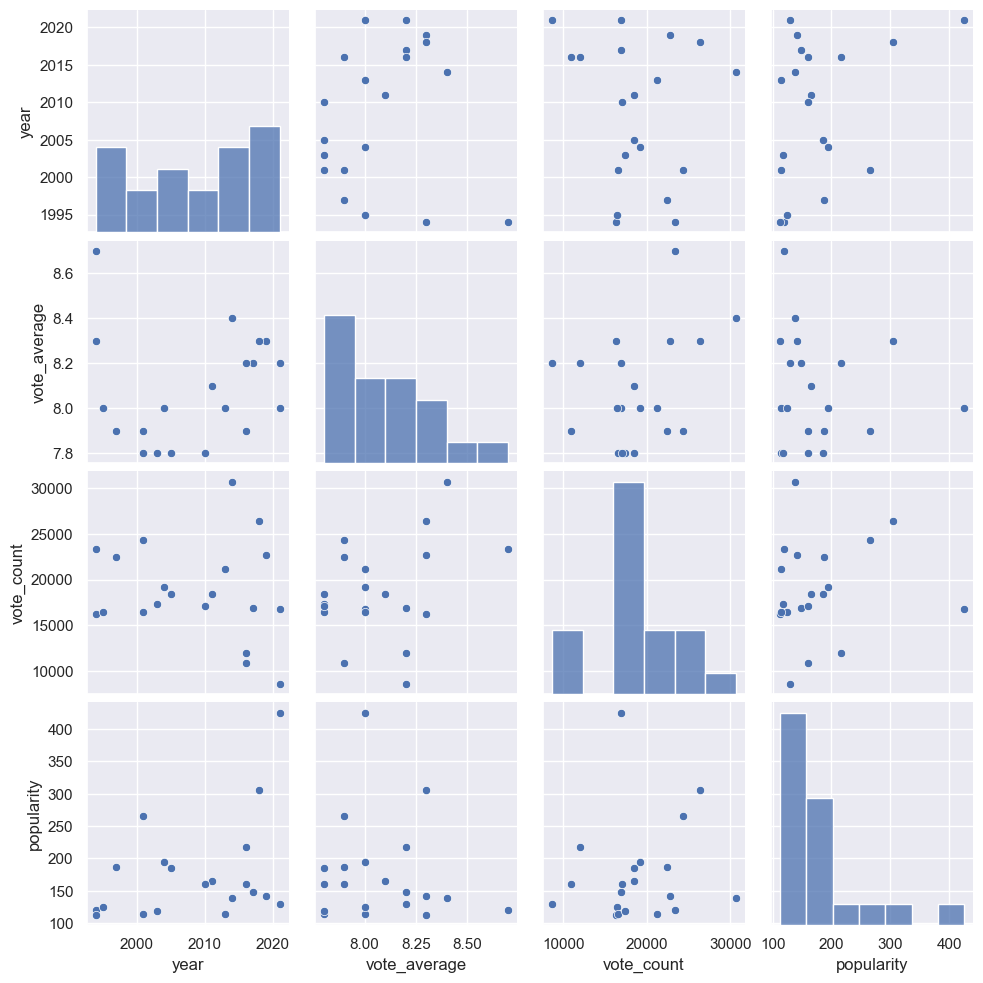

In [111]:
sns.pairplot(movie_english[(movie_english['vote_count']>=7000) & (movie_english['vote_average']>=7.8) & (movie_english['popularity']>=110)])

# BOLLYWOOD Movies

In [112]:
Bollywood


,title,year,month,day,original_language,vote_average,vote_count,popularity
6,Dilwale Dulhania Le Jayenge,1995,October,Thursday,hi,8.6,4069,25.749
249,My Name Is Khan,2010,February,Wednesday,hi,8.1,1122,28.781
334,Like Stars on Earth,2007,December,Friday,hi,8.0,953,14.185
343,3 Idiots,2009,December,Wednesday,hi,8.0,2035,31.622
372,Dangal,2016,December,Wednesday,hi,8.0,801,15.153
538,Bajrangi Bhaijaan,2015,July,Friday,hi,7.9,396,12.367
614,Kabhi Khushi Kabhie Gham,2001,December,Friday,hi,7.8,461,16.642
672,Drishyam,2015,July,Thursday,hi,7.8,315,11.317
834,PK,2014,December,Thursday,hi,7.7,827,9.519
990,Andhadhun,2018,October,Friday,hi,7.6,390,11.629


In [113]:
Bollywood.describe()


,year,vote_average,vote_count,popularity
count,47.000000,47.000000,47.000000,47.000000
mean,2008.489362,7.261702,452.191489,11.375979
std,7.371721,0.548339,626.502217,5.203171
min,1975.000000,5.700000,208.000000,6.109000
25%,2005.000000,7.000000,225.000000,8.381500
50%,2010.000000,7.300000,267.000000,10.013000
75%,2013.000000,7.550000,348.000000,12.323000
max,2018.000000,8.600000,4069.000000,31.622000


In [114]:
Bollywood.value_counts('year')


year
2013    5
2012    5
2008    4
2015    4
2007    4
2001    3
2014    3
2004    3
2011    2
2016    2
2018    2
2006    2
2003    2
2010    1
2009    1
1995    1
2002    1
1998    1
1975    1
dtype: int64

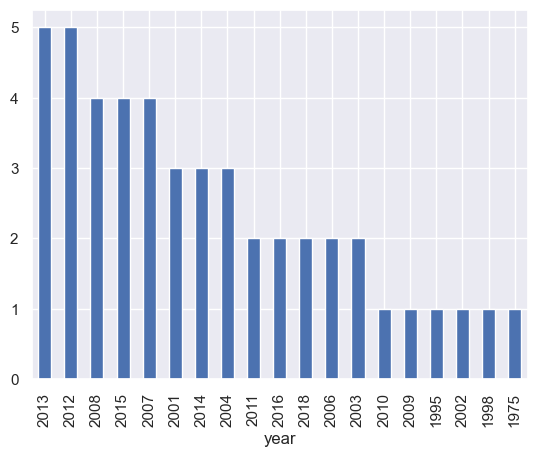

In [115]:
Bollywood.value_counts('year').plot(kind = 'bar')
plt.show()


In [116]:
# Top 10 best rated bollywood movies
Bollywood.sort_values('vote_average',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
6,Dilwale Dulhania Le Jayenge,1995,October,Thursday,hi,8.6,4069,25.749
249,My Name Is Khan,2010,February,Wednesday,hi,8.1,1122,28.781
334,Like Stars on Earth,2007,December,Friday,hi,8.0,953,14.185
372,Dangal,2016,December,Wednesday,hi,8.0,801,15.153
343,3 Idiots,2009,December,Wednesday,hi,8.0,2035,31.622
538,Bajrangi Bhaijaan,2015,July,Friday,hi,7.9,396,12.367
614,Kabhi Khushi Kabhie Gham,2001,December,Friday,hi,7.8,461,16.642
672,Drishyam,2015,July,Thursday,hi,7.8,315,11.317
834,PK,2014,December,Thursday,hi,7.7,827,9.519
1150,Kuch Kuch Hota Hai,1998,October,Friday,hi,7.6,332,12.885


In [117]:
# Top 10 least rated bollywood movies
Bollywood.sort_values('vote_average',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
3292,Om Shanti Om,2007,November,Wednesday,hi,7.0,281,12.873
3888,Padmaavat,2018,January,Thursday,hi,6.9,229,10.647
3959,Dil Chahta Hai,2001,July,Tuesday,hi,6.9,236,8.553
3985,Main Hoon Na,2004,April,Friday,hi,6.9,208,12.009
5361,Dilwale,2015,December,Friday,hi,6.6,255,11.092
5543,Chennai Express,2013,August,Thursday,hi,6.6,275,8.272
6750,Fan,2016,April,Thursday,hi,6.3,214,6.109
7845,Happy New Year,2014,October,Friday,hi,6.1,210,8.158
8266,Dhoom 3,2013,December,Thursday,hi,6.0,231,9.742
9506,Ra.One,2011,October,Monday,hi,5.7,289,9.214


In [118]:
# Top 10 movies with high vote_count
Bollywood.sort_values('vote_count',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
6,Dilwale Dulhania Le Jayenge,1995,October,Thursday,hi,8.6,4069,25.749
343,3 Idiots,2009,December,Wednesday,hi,8.0,2035,31.622
249,My Name Is Khan,2010,February,Wednesday,hi,8.1,1122,28.781
334,Like Stars on Earth,2007,December,Friday,hi,8.0,953,14.185
834,PK,2014,December,Thursday,hi,7.7,827,9.519
372,Dangal,2016,December,Wednesday,hi,8.0,801,15.153
2118,The Lunchbox,2013,September,Friday,hi,7.3,596,7.338
2235,Lagaan: Once Upon a Time in India,2001,June,Friday,hi,7.3,469,10.922
614,Kabhi Khushi Kabhie Gham,2001,December,Friday,hi,7.8,461,16.642
538,Bajrangi Bhaijaan,2015,July,Friday,hi,7.9,396,12.367


In [119]:
# 10 movies with least vote_count
Bollywood.sort_values('vote_count',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
3435,Don,2006,October,Friday,hi,7.0,218,7.972
2064,Jab We Met,2007,October,Friday,hi,7.3,218,9.708
1679,Veer-Zaara,2004,November,Friday,hi,7.4,217,11.007
6750,Fan,2016,April,Thursday,hi,6.3,214,6.109
2758,Jab Tak Hai Jaan,2012,November,Tuesday,hi,7.2,212,8.358
1530,Bhaag Milkha Bhaag,2013,July,Friday,hi,7.5,211,8.772
2352,Yeh Jawaani Hai Deewani,2013,May,Friday,hi,7.3,210,7.312
7845,Happy New Year,2014,October,Friday,hi,6.1,210,8.158
1971,Jodhaa Akbar,2008,February,Wednesday,hi,7.4,210,8.741
3985,Main Hoon Na,2004,April,Friday,hi,6.9,208,12.009


In [120]:
# Top 10 most popular movies
Bollywood.sort_values('popularity',ascending=False).head(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
343,3 Idiots,2009,December,Wednesday,hi,8.0,2035,31.622
249,My Name Is Khan,2010,February,Wednesday,hi,8.1,1122,28.781
6,Dilwale Dulhania Le Jayenge,1995,October,Thursday,hi,8.6,4069,25.749
614,Kabhi Khushi Kabhie Gham,2001,December,Friday,hi,7.8,461,16.642
372,Dangal,2016,December,Wednesday,hi,8.0,801,15.153
2690,Gangs of Wasseypur - Part 1,2012,June,Friday,hi,7.2,299,14.869
334,Like Stars on Earth,2007,December,Friday,hi,8.0,953,14.185
3255,Sholay,1975,August,Friday,hi,7.1,218,13.457
2369,Bajirao Mastani,2015,December,Friday,hi,7.3,240,13.089
1150,Kuch Kuch Hota Hai,1998,October,Friday,hi,7.6,332,12.885


In [121]:
# 10 least popular movies
Bollywood.sort_values('popularity',ascending=False).tail(10)

,title,year,month,day,original_language,vote_average,vote_count,popularity
7845,Happy New Year,2014,October,Friday,hi,6.1,210,8.158
3435,Don,2006,October,Friday,hi,7.0,218,7.972
2709,Rang De Basanti,2006,January,Thursday,hi,7.2,364,7.904
1438,Barfi!,2012,September,Thursday,hi,7.5,270,7.802
2118,The Lunchbox,2013,September,Friday,hi,7.3,596,7.338
2352,Yeh Jawaani Hai Deewani,2013,May,Friday,hi,7.3,210,7.312
1866,Queen,2014,March,Friday,hi,7.4,230,7.264
2598,Munna Bhai M.B.B.S.,2003,December,Friday,hi,7.2,237,6.822
2751,English Vinglish,2012,September,Friday,hi,7.2,221,6.583
6750,Fan,2016,April,Thursday,hi,6.3,214,6.109


In [122]:
#lets find out best performing movies who satisfy our conditions
Bollywood[(Bollywood['vote_count']>=1000) & (Bollywood['vote_average']>=7.8) & (Bollywood['popularity']>=10)]

,title,year,month,day,original_language,vote_average,vote_count,popularity
6,Dilwale Dulhania Le Jayenge,1995,October,Thursday,hi,8.6,4069,25.749
249,My Name Is Khan,2010,February,Wednesday,hi,8.1,1122,28.781
343,3 Idiots,2009,December,Wednesday,hi,8.0,2035,31.622


In [123]:
# Let's find out number movie released per month and compare with successful movies
# Most of the latest movies were released in September and october
Bollywood.value_counts('month')

month
December     12
October       7
July          6
November      4
September     4
August        3
April         2
February      2
January       2
June          2
March         2
May           1
dtype: int64

In [124]:
Bollywood[(Bollywood['vote_count']>=1000) & (Bollywood['vote_average']>=7.8) & (Bollywood['popularity']>=10)].value_counts('month')

month
December    1
February    1
October     1
dtype: int64

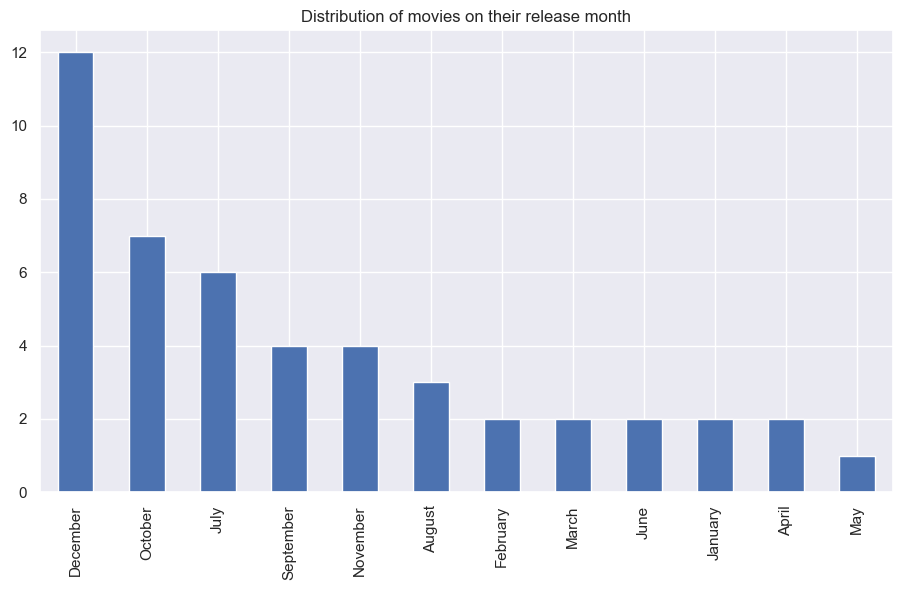

In [125]:
plt.figure(figsize=(11,6))
Bollywood['month'].value_counts().plot(kind = 'bar')
plt.title('Distribution of movies on their release month')
plt.show()

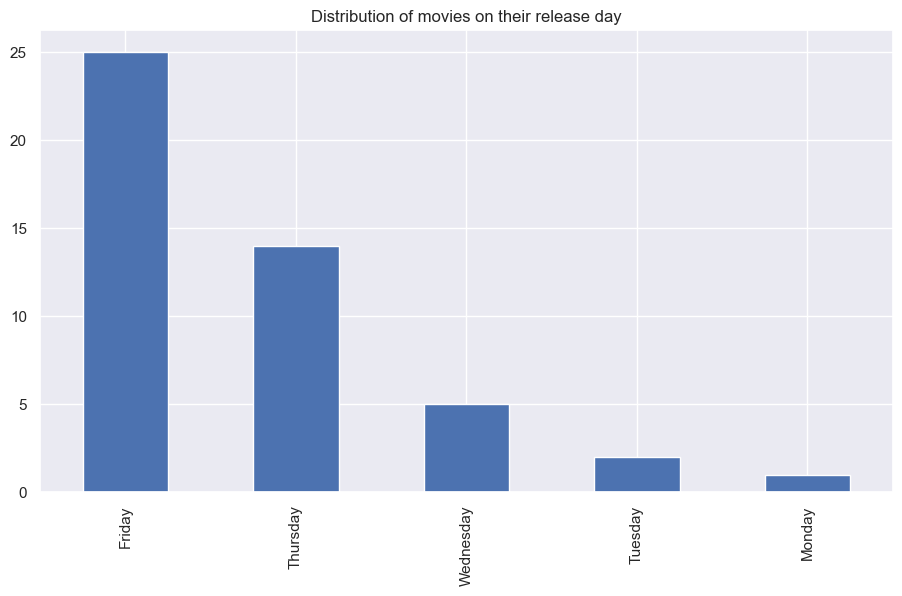

In [126]:
# Majority of english movies were released on friday
plt.figure(figsize=(11,6))
Bollywood['day'].value_counts().plot(kind = 'bar')
plt.title('Distribution of movies on their release day')
plt.show()

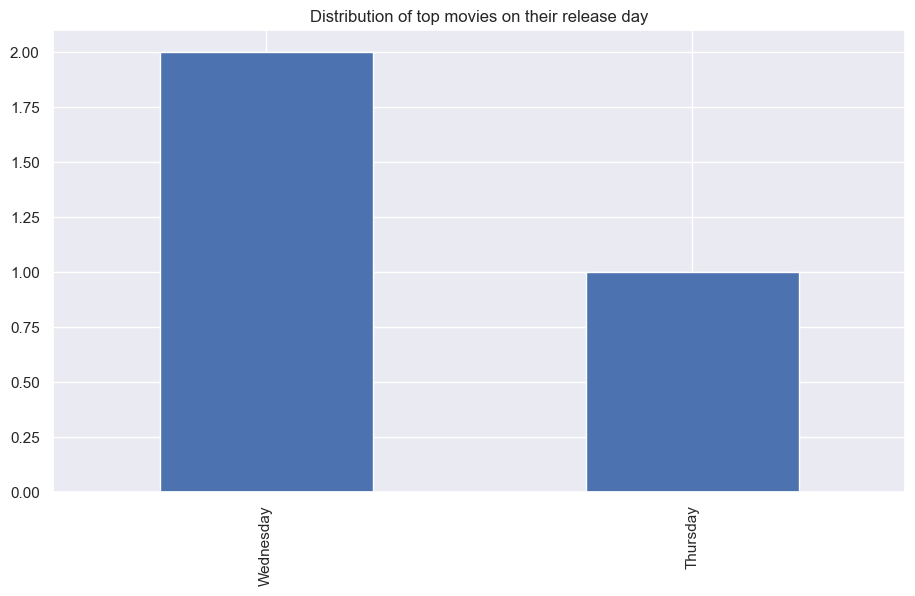

In [127]:
# Majority of successful Bollywood movies were released on Wednesday 
plt.figure(figsize=(11,6))
Bollywood[(Bollywood['vote_count']>=1000) & (Bollywood['vote_average']>=7.8) & (Bollywood['popularity']>=10)]['day'].value_counts().plot(kind = 'bar')
plt.title('Distribution of top movies on their release day')
plt.show()

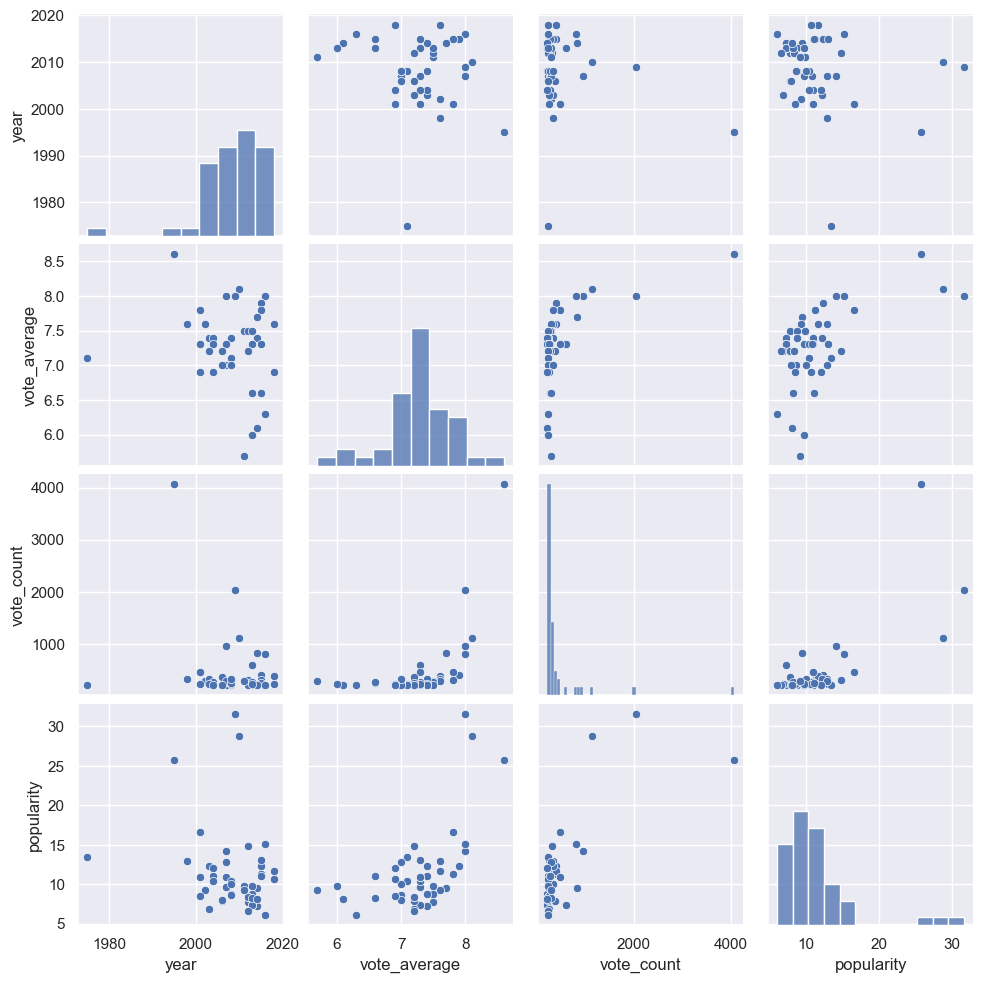

In [128]:
sns.pairplot(Bollywood)

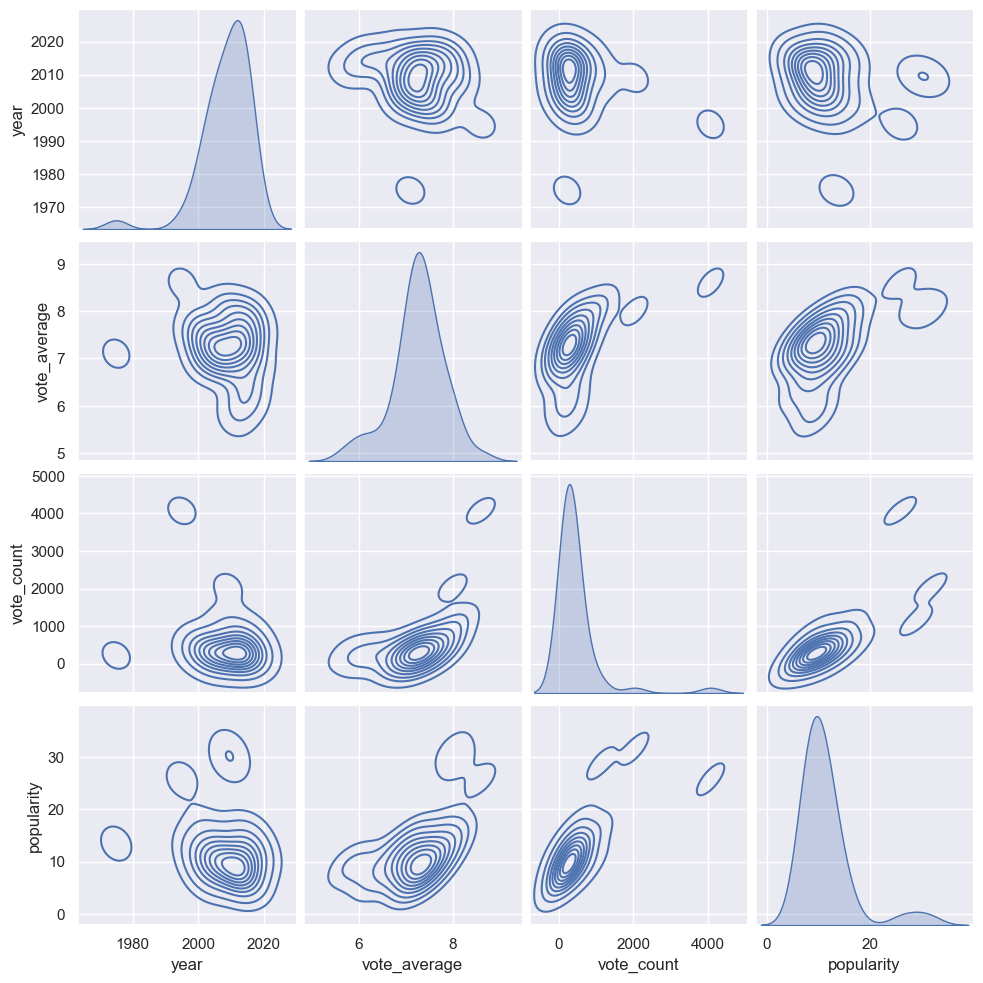

In [129]:
sns.pairplot(Bollywood,kind='kde')